# Targets: Using Machine Learning Classification Models to Identify Salient Predictors of Cannabis Arrests in New York City, 2006-2018

# Data Cleaning Notebook for Cannabis Crimes

As has been reported (Levine, 2017; Harcourt & Ludwig, 2006; Mueller, Gebeloff, & Chinoy, 2018), data on low-level cannabis possession arrests in New York City have shown that they have been predominantly of young African-American and Latino men since at least 1987. Given the history of the drug war under Presidents Nixon, Reagan, Bush Sr., Clinton, and Bush Jr., and initially under Harry Anslinger during his years as the first Commissioner of the U.S. Treasury Department's Federal Bureau of Narcotics during the Jazz Age, this racial disparity of low-level cannabis arrests has likely remained constant since the Marijuana Tax Act of 1937 passed, which effectively made the plant illegal. However, data from the Substance Abuse and Mental Health Services Administration of the U.S. Department of Health and Human Services shows consistently that people of different racial groups use cannabis at effectively the same rate (SAMHSA, 2016). This is an issue of extreme concern for human and civil rights groups, as it allows discrimination in criminal justice under the guise of public health concerns.


This racial disparity in cannabis arrests continues to this day through the mayoral transition to Mayor DeBlasio from Mayor Bloomberg's policy era of stop-and-frisk arrests, even while cannabis arrests have dropped since their height around 2011 (Levine). At the same time, overall crime has dropped in New York City (Mueller, Gebeloff, & Chinoy, 2018). The New York Police Department (NYPD) has been pressed to explain this disparity, and has responded by saying that it is due to the fact that they receive more cannabis-related complaints from neighborhoods which are predominantly occupied by African-American and Latino residents. 


The New York Times has done an analysis exploring this claim, and has shown that even between neighborhoods that have the same level of cannabis-related complaints, more cannabis arrests occur in neighborhoods with a majority of African-American and Latino residents (Mueller, Gebeloff, & Chinoy, 2018). One explanation for the racial disparity is that these neighborhoods are often more policed because of a higher rate of violent crimes there. Another explanation is that when people are arrested for cannabis, NYPD officers are able to check for open warrants and are therefore a way for police officers to cut down on other types of crime through these arrests. But these explanations do not fully illustrate the reasons that this racial disparity in low-level cannabis arrests persist during an era of criminal justice reform, given the data available. 


While looking at both low-level and more serious cannabis arrests including felony sales, this report aims to provide a more complete picture of the predictors that influence cannabis arrests in New York City. In order to do so, machine learning classification methods will be applied to predict the following five target features: misdemeanor cannabis possession, violation cannabis possession, felony cannabis possession, misdemeanor cannabis sales, and felony cannabis sales. Additionally, these methods will be used to predict possession arrests vs. sales arrests. Violation sales were not used as a target feature as violation sales of cannabis are not a legal category.


Classification methods will also be used to try and differentiate predictors of cannabis crimes from non-cannabis crimes; in other words, all other crimes. This will be done using all cannabis crimes and a set of non-cannabis crimes of the same size randomly selected from the larger pool of non-cannabis crimes. By using machine learning methods to discover the features with the largest coefficients within classification models, the identification of biases in the most scientific sense of the term can be identified for future research and analysis by criminologists, human rights groups, legal scholars, public policy researchers, and more.


These methods will be used on all crimes between January 1st, 2006 and December 31st, 2018 in New York City as reported by the NYPD's Complaint Data historic dataset. A set of features from the original dataset and a set of features derived from this data will be used to create classification models that will attempt to identify several salient predictors of cannabis arrests in New York City during modern times. It is important to note that the data cleaning protocols and classification models developed in this project can also be modified to investigate the predictive factors of any type of crime that occurs in New York City. 


Hopefully this project will present a fuller image of cannabis arrests that can be used to inform and improve drug policy in New York City and in the rest of the country, so that the suffering caused by Drug War policies can be reduced.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 1860)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

The "NYPD Complaint Data Historic" dataset downloaded from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i will be used to build classification models of cannabis crime. These models will be used to identify the primary features that differentiate the five categories of cannabis crime, the primary features that differentiate sales vs. possession crimes, and the primary features that differentiate cannabis crimes from all other crimes in New York City between 2006 and 2018, providing a comprehensive image of the coefficients of cannabis arrests within the bounds of the dataset provided by the NYPD. First, a DataFrame is constructed for the classification of the five categories of cannabis crimes, and the classification of possession vs. sales crimes.

The NYPD's dataset is first loaded into the 'nyc_crime' DataFrame below.

In [3]:
nyc_data_path = open('/Users/DanLoew/Documents/Academia/Springboard/NYPD_Complaint_Data_Historic.csv', 'r')
nyc_crime = pd.read_csv(nyc_data_path)

/Users/DanLoew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columns 18 and 20 are identified using the .columns attribute.

In [4]:
nyc_crime.columns[18]

'PARKS_NM'

In [5]:
nyc_crime.columns[20]

'HOUSING_PSA'

According to the data dictionary from the NYPD, 'HOUSING_PSA' is the numeric code for housing developments. However, there is already a feature for housing developments called 'HADEVELOPT', which contains clear names for each of the housing developments, so 'HOUSING_PSA' is superfluous. Also, there is no clear crosswalk in the NYPD's data dictionary which connects the numeric codes with the housing development names so the 'HOUSING_PSA' feature is useless.

The 'JURISDICTION_CODE' feature will also be dropped as it had numerical codes that were not labelled in the NYPD's data dictionary, and therefore are meaningless. Also, a jurisdiction code variable named 'JURIS_DESC' with text labels also exists, so the numerical code isn't needed.

The 'PARKS_NM' feature contains which city park each crime occurred in, which could lend predictive power to the classification models planned for this project. Therefore, it will be kept, but the data type needs to be coerced so it is not of mixed type. Therefore the 'nyc_crime' DataFrame is first deleted and then re-loaded with the data type for 'PARKS_NM' coerced to string data type. The 'HOUSING_PSA' and 'JURISDICTION_CODE' features will be dropped after re-loading of the data set into the 'nyc_crime' DataFrame.

In [6]:
del nyc_crime

In [7]:
nyc_data_path = open('/Users/DanLoew/Documents/Academia/Springboard/NYPD_Complaint_Data_Historic.csv', 'r')
nyc_crime = pd.read_csv(nyc_data_path, dtype={'PARKS_NM': str})

/Users/DanLoew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
nyc_crime = nyc_crime.drop(columns=['HOUSING_PSA', 'JURISDICTION_CODE'])

The dtype argument in pd.read_csv should turn all values in 'PARKS_NM' to the string data type, but this needs to be checked on. There may be an issue where the null values in the 'PARKS_NM' column are of a different data type than the non-null values. To check on this, the data type of the first row of non-null values is first looked at to see what data type it is.

In [9]:
type(nyc_crime['PARKS_NM'].dropna().iloc[0])

str

The result returned in cell 9 is good news as it shows that rows with a non-null value for 'PARKS_NM' are of string data type, which is the correct data type. The values of the 'PARKS_NM' feature, and the data type of its null values, are looked at next.

In [10]:
nyc_crime['PARKS_NM'].value_counts().head()

CENTRAL PARK                      1252
FLUSHING MEADOWS CORONA PARK      1016
CONEY ISLAND BEACH & BOARDWALK     805
RIVERSIDE PARK                     495
PROSPECT PARK                      385
Name: PARKS_NM, dtype: int64

In [11]:
type(nyc_crime['PARKS_NM'].isnull().iloc[0])

numpy.bool_

The null values for 'PARKS_NM' will be changed to 'unknown', a string value, later in the notebook. This will ensure 'PARKS_NM' is in one data type and enable it to be binarized so that it can be incorporated into the machine learning classification models later in the project.

# Introduction to the nyc_crime DataFrame

Below is a first look through the DataFrame using .head(), .tail(), .shape, .info(), .describe(), and .columns.

In [12]:
nyc_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,577055921,12/31/2018,19:00:00,12/31/2018,19:35:00,75.0,12/31/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NaN,EAST NEW YORK CITY LINE,1019655.0,182468.0,<18,BLACK,F,NaN,40.667447,-73.872377,"(40.667446665, -73.872377258)",PATROL BORO BKLYN NORTH,NaN,18-24,BLACK,M
1,311304275,12/31/2018,15:00:00,12/31/2018,16:00:00,41.0,12/31/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,N.Y. POLICE DEPT,NaN,NaN,1015845.0,236500.0,25-44,WHITE HISPANIC,F,NaN,40.815765,-73.885857,"(40.815765327, -73.885857339)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F
2,427481098,12/31/2018,18:00:00,12/31/2018,18:30:00,14.0,12/31/2018,109,GRAND LARCENY,410.0,"LARCENY,GRAND FROM RETAIL STORE, UNATTENDED",COMPLETED,FELONY,MANHATTAN,INSIDE,CLOTHING/BOUTIQUE,N.Y. POLICE DEPT,NaN,NaN,988318.0,212070.0,NaN,NaN,NaN,NaN,40.748767,-73.985320,"(40.748767014, -73.985319659)",PATROL BORO MAN SOUTH,NaN,18-24,UNKNOWN,F
3,212387335,12/31/2018,16:50:00,12/31/2018,17:00:00,81.0,12/31/2018,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,NaN,1006734.0,188708.0,25-44,BLACK,M,NaN,40.684616,-73.918933,"(40.684616294, -73.918932657)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,M
4,629543587,12/31/2018,00:45:00,12/31/2018,01:00:00,26.0,12/31/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,OTHER,N.Y. POLICE DEPT,NaN,NaN,994261.0,232730.0,18-24,BLACK,F,NaN,40.805469,-73.963840,"(40.805468548, -73.963840045)",PATROL BORO MAN NORTH,NaN,25-44,WHITE HISPANIC,M


In [13]:
nyc_crime.tail()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
6500865,608025222,NaN,18:00:00,NaN,NaN,23.0,06/06/2014,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NaN,NaN,1001924.0,227875.0,NaN,BLACK,F,NaN,40.792131,-73.936173,"(40.792130892, -73.936172792)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,M
6500866,347331285,NaN,23:55:00,11/21/2014,00:05:00,7.0,11/21/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,NaN,NaN,988082.0,200814.0,NaN,UNKNOWN,M,NaN,40.717872,-73.986178,"(40.717872161, -73.986177815)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE HISPANIC,M
6500867,129237914,NaN,17:50:00,NaN,NaN,25.0,08/22/2015,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,COMMERCIAL BUILDING,N.Y. POLICE DEPT,NaN,NaN,1001315.0,230818.0,NaN,BLACK,M,NaN,40.800210,-73.938365,"(40.800209825, -73.938364683)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D
6500868,230239029,NaN,09:25:00,02/20/2011,09:35:00,106.0,02/20/2011,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,1037260.0,184030.0,18-24,ASIAN / PACIFIC ISLANDER,M,NaN,40.671646,-73.808905,"(40.671646094, -73.808904508)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
6500869,215287089,NaN,01:00:00,03/06/2015,14:00:00,72.0,03/06/2015,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,NaN,NaN,979853.0,171117.0,NaN,NaN,NaN,NaN,40.636360,-74.015844,"(40.636360331, -74.015843892)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F


In [14]:
nyc_crime.shape

(6500870, 33)

In [15]:
nyc_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500870 entries, 0 to 6500869
Data columns (total 33 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
ADDR_PCT_CD          float64
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
JURIS_DESC           object
PARKS_NM             object
HADEVELOPT           object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon              object
PATROL_BORO          object
STATION_NAME         object
VIC_AGE_GROUP        object
VIC_RACE      

In [16]:
nyc_crime.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,6.500870e+06,6500215,6500822,4893769,4898069,6.498704e+06,6500870,6.500870e+06,6482065,6.495374e+06,6495374,6500863,6500870,6490352,5106061,6463167,6500870,20959,323664,6.483531e+06,6.483531e+06,1909907,3278448,3145134,144110.000000,6.483531e+06,6.483531e+06,6483531,6494917,144110,4862429,6500565,6500566
unique,NaN,7705,1441,6002,1441,NaN,4748,NaN,70,NaN,414,2,3,5,5,72,25,1130,279,NaN,NaN,95,8,3,NaN,NaN,NaN,115631,8,371,192,8,5
top,NaN,01/01/2010,12:00:00,10/17/2014,12:00:00,NaN,05/29/2007,NaN,PETIT LARCENY,NaN,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,N.Y. POLICE DEPT,CENTRAL PARK,CASTLE HILL,NaN,NaN,25-44,BLACK,M,NaN,NaN,NaN,"(40.750430768, -73.989282176)",PATROL BORO BRONX,125 STREET,25-44,UNKNOWN,F
freq,NaN,2426,173998,1369,86413,NaN,1891,NaN,1072782,NaN,564308,6389307,3683269,1935028,3278342,2100852,5774513,1252,7081,NaN,NaN,798541,1224987,1995894,NaN,NaN,NaN,20668,1409156,7427,2110528,2186733,2539404
mean,5.500375e+08,NaN,NaN,NaN,NaN,6.334385e+01,NaN,2.951970e+02,NaN,4.158180e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004771e+06,2.069993e+05,NaN,NaN,NaN,13.634946,4.073480e+01,-7.392592e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,2.597725e+08,NaN,NaN,NaN,NaN,3.446073e+01,NaN,1.494116e+02,NaN,2.181813e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178907e+04,3.164418e+04,NaN,NaN,NaN,12.485026,8.675600e-02,7.857901e-02,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000001e+08,NaN,NaN,NaN,NaN,1.000000e+00,NaN,1.010000e+02,NaN,1.010000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.110000e+02,NaN,NaN,NaN,1.000000,4.011271e+01,-7.751921e+01,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.251865e+08,NaN,NaN,NaN,NaN,4.000000e+01,NaN,1.170000e+02,NaN,2.540000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.916830e+05,1.842840e+05,NaN,NaN,NaN,3.000000,4.067243e+01,-7.397323e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.499805e+08,NaN,NaN,NaN,NaN,6.300000e+01,NaN,3.410000e+02,NaN,3.880000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004369e+06,2.058520e+05,NaN,NaN,NaN,11.000000,4.073167e+01,-7.392733e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.749793e+08,NaN,NaN,NaN,NaN,9.400000e+01,NaN,3.510000e+02,NaN,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016581e+06,2.351590e+05,NaN,NaN,NaN,30.000000,4.081212e+01,-7.388328e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nyc_crime.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'PARKS_NM', 'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'], dtype='object')

To ensure that there are no duplicate rows, which can be a source of machine learning model leakage, the .drop_duplicates() method is used.

In [18]:
nyc_crime = nyc_crime.drop_duplicates()
nyc_crime.shape

(6500870, 33)

The above .shape call shows that there were no duplicate rows, as the row count matches the row count returned from the .info() call in cell 15 above.

# Creation of Cannabis Crimes DataFrame

To conduct exploratory data analysis (EDA) of cannabis crimes as a whole from 2006 to 2018, and for machine learning classification of five different categories of cannabis crime (see below), a new 'nyc_cann' DataFrame is subsetted from the entire crimes DataFrame with just cannabis crimes. These are defined by the PD_CD variable, which defines cannabis crimes under the five following types:

566 - Marijuana, Possession (violation level)

567 - Marijuana, Possession, 4th & 5th degree (misdemeanor level)

568 - Marijuana, Possession, 1st, 2nd, and 3rd degree (felony level)

569 - Marijuana, Sales 4th & 5th degree (misdemeanor level)

570 - Marijuana, Sales, 1st, 2nd, and 3rd degree (felony level)

In [19]:
nyc_cann = nyc_crime[(nyc_crime.PD_CD >= 566.0) & (nyc_crime.PD_CD <=570.0)]

To ensure that only cannabis arrests are included in the nyc_cann DataFrame, the value counts are called on 'PD_DESC', which is the penal code description feature.

In [20]:
nyc_cann.PD_DESC.value_counts()

MARIJUANA, POSSESSION 4 & 5       197677
MARIJUANA, SALE 4 & 5              11462
MARIJUANA, POSSESSION               6791
MARIJUANA, POSSESSION 1, 2 & 3      3769
MARIJUANA, SALE 1, 2 & 3            1118
Name: PD_DESC, dtype: int64

Now that the 'nyc_cann' DataFrame is created, the 'nyc_crime' DataFrame is no longer needed and can be deleted to free up memory.

In [21]:
del nyc_crime

Below is a first look at the reduced DataFrame of just cannabis crimes using .head(), .tail(), .shape, .info(), .describe(), and .columns. The type of 'nyc_cann' is also called to confirm that it is a DataFrame.

In [22]:
nyc_cann.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
148,498164466,12/31/2018,21:55:00,12/31/2018,22:12:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,979947.0,160366.0,25-44,BLACK HISPANIC,M,NaN,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
536,145023256,12/31/2018,17:00:00,12/31/2018,17:07:00,26.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,NaN,NaN,997349.0,235298.0,18-24,BLACK,M,NaN,40.812513,-73.952681,"(40.812512958, -73.952680664)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
899,286264352,12/30/2018,17:25:00,12/30/2018,17:29:00,109.0,12/30/2018,678,MISCELLANEOUS PENAL LAW,566.0,"MARIJUANA, POSSESSION",COMPLETED,VIOLATION,QUEENS,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,1030153.0,215586.0,25-44,BLACK,M,NaN,40.758299,-73.834309,"(40.758299326, -73.834309457)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E
1114,606039781,12/30/2018,00:35:00,12/30/2018,00:35:00,6.0,12/30/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,NaN,NaN,983985.0,205857.0,25-44,WHITE,M,2.0,40.731715,-74.000958,"(40.731714801, -74.000957613)",PATROL BORO MAN SOUTH,W. 4 STREET,UNKNOWN,UNKNOWN,E
1148,698392952,12/30/2018,17:40:00,12/30/2018,17:45:00,44.0,12/30/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,NaN,NaN,1008924.0,245473.0,25-44,WHITE HISPANIC,M,NaN,40.840416,-73.910828,"(40.840415681, -73.910828006)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


In [23]:
type(nyc_cann)

pandas.core.frame.DataFrame

The cell below shows that 220,817 cannabis crimes were recorded by the NYPD in their "NYPD Complaint Data Historic" dataset as of the end of calendar year 2018. 

In [24]:
nyc_cann.shape

(220817, 33)

In [25]:
nyc_cann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220817 entries, 148 to 6500661
Data columns (total 33 columns):
CMPLNT_NUM           220817 non-null int64
CMPLNT_FR_DT         220815 non-null object
CMPLNT_FR_TM         220816 non-null object
CMPLNT_TO_DT         153363 non-null object
CMPLNT_TO_TM         153436 non-null object
ADDR_PCT_CD          220817 non-null float64
RPT_DT               220817 non-null object
KY_CD                220817 non-null int64
OFNS_DESC            220817 non-null object
PD_CD                220817 non-null float64
PD_DESC              220817 non-null object
CRM_ATPT_CPTD_CD     220817 non-null object
LAW_CAT_CD           220817 non-null object
BORO_NM              220632 non-null object
LOC_OF_OCCUR_DESC    128740 non-null object
PREM_TYP_DESC        219086 non-null object
JURIS_DESC           220817 non-null object
PARKS_NM             2485 non-null object
HADEVELOPT           27178 non-null object
X_COORD_CD           220345 non-null float64
Y_COORD_

In [26]:
nyc_cann.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,2.208170e+05,220815,220816,153363,153436,220817.000000,220817,220817.000000,220817,220817.000000,220817,220817,220817,220632,128740,219086,220817,2485,27178,2.203450e+05,2.203450e+05,34809,35267,35230,3544.000000,220345.000000,220345.000000,220345,220816,3544,32444,220763,220763
unique,NaN,4768,1414,4729,1430,NaN,4734,NaN,2,NaN,5,2,3,5,4,68,19,417,257,NaN,NaN,7,7,3,NaN,NaN,NaN,32984,8,308,7,7,4
top,NaN,02/18/2011,21:00:00,02/18/2011,20:00:00,NaN,02/18/2011,NaN,DANGEROUS DRUGS,NaN,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,MACOMBS DAM PARK,CASTLE HILL,NaN,NaN,25-44,BLACK,M,NaN,NaN,NaN,"(40.823101299, -73.869690461)",PATROL BORO BRONX,42 ST.-PORT AUTHORITY BUS TERM,UNKNOWN,UNKNOWN,E
freq,NaN,136,2015,96,1037,NaN,129,NaN,214026,NaN,197677,219534,209139,87060,64441,127751,173380,127,854,NaN,NaN,15466,17812,31507,NaN,NaN,NaN,608,87129,285,32040,220125,219862
mean,5.497683e+08,NaN,NaN,NaN,NaN,54.122708,NaN,246.012499,NaN,567.105318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.005691e+06,2.168080e+05,NaN,NaN,NaN,11.214729,40.761733,-73.922574,NaN,NaN,NaN,NaN,NaN,NaN
std,2.602333e+08,NaN,NaN,NaN,NaN,25.713680,NaN,78.881859,NaN,0.538450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492497e+04,3.233979e+04,NaN,NaN,NaN,11.086751,0.088742,0.053873,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000030e+08,NaN,NaN,NaN,NaN,1.000000,NaN,117.000000,NaN,566.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.134630e+05,1.212190e+05,NaN,NaN,NaN,1.000000,40.499143,-74.254560,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.247462e+08,NaN,NaN,NaN,NaN,40.000000,NaN,235.000000,NaN,567.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.984310e+05,1.851210e+05,NaN,NaN,NaN,2.000000,40.674767,-73.948805,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.492611e+08,NaN,NaN,NaN,NaN,47.000000,NaN,235.000000,NaN,567.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007174e+06,2.299650e+05,NaN,NaN,NaN,4.000000,40.797872,-73.917210,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.759355e+08,NaN,NaN,NaN,NaN,73.000000,NaN,235.000000,NaN,567.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014902e+06,2.427900e+05,NaN,NaN,NaN,12.000000,40.833029,-73.889340,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
nyc_cann.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'PARKS_NM', 'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'], dtype='object')

First, the distribution of marijuana crime PD codes is looked at. Misdemeanor possession composes the majority of cannabis crimes. These value counts will serve as a reference to check the new cannabis crime category features created below, which will eventually serve as the target features for the classification models of different cannabis crime categories.

In [28]:
nyc_cann['PD_CD'].value_counts()

567.0    197677
569.0     11462
566.0      6791
568.0      3769
570.0      1118
Name: PD_CD, dtype: int64

The less granular 'LAW_CAT_CD' is looked at to see the distribution of misdemeanor crimes, violation crimes, and felony crimes involving cannabis.

In [29]:
nyc_cann['LAW_CAT_CD'].value_counts()

MISDEMEANOR    209139
VIOLATION        6791
FELONY           4887
Name: LAW_CAT_CD, dtype: int64

Next, a Boolean mask Series for cannabis possession is defined based on the three codes for cannabis possession in the NYC penal code.

In [30]:
cann_poss = (nyc_cann.PD_CD == 566.0) | (nyc_cann.PD_CD == 567.0) | (nyc_cann.PD_CD == 568.0)

Next, a new integer type feature for cannabis possession is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'cann_poss' to it, assigning values of '1' for cannabis possession and '0' for cannabis sales. This feature will be used for the classification models differentiating cannabis possession crimes from cannabis sales crimes.

In [31]:
nyc_cann['possession'] = cann_poss.astype(int)

The next cell double-checks that the 'possession' value counts equal the combined value counts for PD_CD 566, 567, and 568 given above in cell 28.

In [32]:
nyc_cann['possession'].value_counts()

1    208237
0     12580
Name: possession, dtype: int64

Next, a Boolean mask Series for cannabis sales is defined based on the two codes for cannabis sales in the NYC penal code.

In [33]:
cann_sales = (nyc_cann.PD_CD == 569.0) | (nyc_cann.PD_CD == 570.0)

Next, a new integer type feature for cannabis sales is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'cann_sales' to it, assigning values of '1' for cannabis sales and '0' for cannabis possession.

In [34]:
nyc_cann['sales'] = cann_sales.astype(int)

The next cell double-checks that the 'sales' value counts equal the combined value counts for PD_CD 569 and 570 given above in cell 28.

In [35]:
nyc_cann['sales'].value_counts()

0    208237
1     12580
Name: sales, dtype: int64

Next, a Boolean mask Series for misdemeanor cannabis crimes is defined based on the 'misdemeanor' value in the LAW_CAT_CD feature.

In [36]:
misdemeanor = nyc_cann.LAW_CAT_CD == 'MISDEMEANOR'

Next, a new integer type feature for misdemeanor cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'misdemeanor' to it, assigning values of '1' for misdemeanor cannabis crimes and '0' for non-misdemeanor cannabis crimes.

In [37]:
nyc_cann['misdemeanor'] = misdemeanor.astype(int)

The next cell double-checks that the 'misdemeanor' feature's value counts equal the 'misdemeanor' value in the 'LAW_CAT_CD' feature given above in cell 29.

In [38]:
nyc_cann['misdemeanor'].value_counts()

1    209139
0     11678
Name: misdemeanor, dtype: int64

Next, a Boolean mask Series for violation cannabis crimes is defined based on the 'violation' value in the LAW_CAT_CD feature.

In [39]:
violation = nyc_cann.LAW_CAT_CD == 'VIOLATION'

Next, a new integer type feature for violation cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'violation' to it, assigning values of '1' for violation cannabis crimes and '0' for non-violation cannabis crimes.

In [40]:
nyc_cann['violation'] = violation.astype(int)

The next cell double-checks that the 'violation' feature's value counts equal the 'violation' value in the 'LAW_CAT_CD' feature given above in cell 29.

In [41]:
nyc_cann['violation'].value_counts()

0    214026
1      6791
Name: violation, dtype: int64

Next, a Boolean mask Series for felony cannabis crimes is defined based on the 'felony' value in the LAW_CAT_CD feature.

In [42]:
felony = nyc_cann.LAW_CAT_CD == 'FELONY'

Next, a new integer type feature for felony cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'felony' to it, assigning values of '1' for felony cannabis crimes and '0' for non-felony cannabis crimes.

In [43]:
nyc_cann['felony'] = felony.astype(int)

The next cell double-checks that the 'felony' feature's value counts equal the 'felony' value in the 'LAW_CAT_CD' feature given above in cell 29.

In [44]:
nyc_cann['felony'].value_counts()

0    215930
1      4887
Name: felony, dtype: int64

# Target Feature Creation for Classification Model of Five Categories of Cannabis Crimes

This is where the creation of the five target features starts, for machine learning classification purposes of the five categories of cannabis crime:

Misdemeanor Cannabis Possession

Violation Cannabis Possession

Felony Cannabis Possession

Misdemeanor Cannabis Sales

Felony Cannabis Sales


There are no crimes recorded as 'violation sales' as that is not a category in New York City's penal code.


This process of creating target features from the native 'PD_CD' and 'LAW_CAT_CD' features is a way of proving which cases belonged to the five categories of cannabis crime in the absence of complete documentation in the NYPD's data dictionary of their "NYPD Complaint Data Historic" dataset.

First, a Boolean mask Series for misdemeanor possession cannabis crimes is defined based on the 'misdemeanor' and 'possession' features.

In [45]:
misd_poss = (nyc_cann.misdemeanor == 1) & (nyc_cann.possession == 1)

Next, a new integer type feature for misdemeanor possession cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'misd_poss' to it, assigning values of '1' for misdemeanor possession cannabis crimes and '0' for other categories of cannabis crimes. This is one of the five target variables for machine learning classification of the five categories of cannabis crimes.

In [46]:
nyc_cann['misd_poss'] = misd_poss.astype(int)

There are 197,677 misdemeanor possession crimes in the 'nyc_cann' DataFrame.

In [47]:
nyc_cann['misd_poss'].value_counts()

1    197677
0     23140
Name: misd_poss, dtype: int64

Next, a Boolean mask Series for violation possession cannabis crimes is defined based on the 'violation' and 'possession' features.

In [48]:
viol_poss = (nyc_cann.violation == 1) & (nyc_cann.possession == 1)

Next, a new integer type feature for violation possession cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'viol_poss' to it, assigning values of '1' for violation possession cannabis crimes and '0' for other categories of cannabis crimes. This is one of the five target variables for machine learning classification of the five categories of cannabis crimes.

In [49]:
nyc_cann['viol_poss'] = viol_poss.astype(int)

There are 6,791 violation possession crimes in the 'nyc_cann' DataFrame.

In [50]:
nyc_cann['viol_poss'].value_counts()

0    214026
1      6791
Name: viol_poss, dtype: int64

Next, a Boolean mask Series for felony possession cannabis crimes is defined based on the 'felony' and 'possession' features.

In [51]:
felony_poss = (nyc_cann.felony == 1) & (nyc_cann.possession == 1)

Next, a new integer type feature for felony possession cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'felony_poss' to it, assigning values of '1' for felony possession cannabis crimes and '0' for other categories of cannabis crimes. This is one of the five target variables for machine learning classification of the five categories of cannabis crimes.

In [52]:
nyc_cann['felony_poss'] = felony_poss.astype(int)

There are 3,769 felony possession crimes in the 'nyc_cann' DataFrame.

In [53]:
nyc_cann['felony_poss'].value_counts()

0    217048
1      3769
Name: felony_poss, dtype: int64

Next, a Boolean mask Series for misdemeanor sales cannabis crimes is defined based on the 'misdemeanor' and 'sales' features.

In [54]:
misd_sales = (nyc_cann.misdemeanor == 1) & (nyc_cann.sales == 1)

Next, a new integer type feature for misdemeanor sales cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'misd_sales' to it, assigning values of '1' for misdemeanor sales cannabis crimes and '0' for other categories of cannabis crimes. This is one of the five target variables for machine learning classification of the five categories of cannabis crimes.

In [55]:
nyc_cann['misd_sales'] = misd_sales.astype(int)

There are 11,462 misdemeanor sales crimes in the 'nyc_cann' DataFrame.

In [56]:
nyc_cann['misd_sales'].value_counts()

0    209355
1     11462
Name: misd_sales, dtype: int64

Just to prove there are no violation cannabis sales in the DataFrame, the following code is run. A Boolean mask Series for violation sales cannabis crimes is defined based on the 'violation' and 'sales' features.

In [57]:
viol_sales = (nyc_cann.violation == 1) & (nyc_cann.sales == 1)

Next, a new integer type feature for violation sales cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'viol_sales' to it, assigning values of '1' for violation sales cannabis crimes and '0' for other categories of cannabis crimes. This will NOT be one of the target features as there are no violation cannabis sales crimes (see cell 59).

In [58]:
nyc_cann['viol_sales'] = viol_sales.astype(int)

In [59]:
nyc_cann['viol_sales'].value_counts()

0    220817
Name: viol_sales, dtype: int64

Next, a Boolean mask Series for felony sales cannabis crimes is defined based on the 'felony' and 'sales' features.

In [60]:
felony_sales = (nyc_cann.felony == 1) & (nyc_cann.sales == 1)

Next, a new integer type feature for felony sales cannabis crimes is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'felony_sales' to it, assigning values of '1' for felony sales cannabis crimes and '0' for other categories of cannabis crimes. This is one of the five target variables for machine learning classification of the five categories of cannabis crimes.

In [61]:
nyc_cann['felony_sales'] = felony_sales.astype(int)

There are 1,118 felony sales crimes in the 'nyc_cann' DataFrame.

In [62]:
nyc_cann['felony_sales'].value_counts()

0    219699
1      1118
Name: felony_sales, dtype: int64

# Null Data Values

The following section focuses on filling and dropping null values, in that order. First, the .shape attribute is called on the 'nyc_cann' DataFrame as a benchmark for the number of rows and features in the DataFrame.

In [63]:
nyc_cann.shape

(220817, 44)

Features with null values are identified in the two cells below. Both .isnull().sum() and .isna().sum() chained methods are called to identify all types of null values. The null value sums match across both chained methods.

In [64]:
nyc_cann.isnull().sum()

CMPLNT_NUM                0
CMPLNT_FR_DT              2
CMPLNT_FR_TM              1
CMPLNT_TO_DT          67454
CMPLNT_TO_TM          67381
ADDR_PCT_CD               0
RPT_DT                    0
KY_CD                     0
OFNS_DESC                 0
PD_CD                     0
PD_DESC                   0
CRM_ATPT_CPTD_CD          0
LAW_CAT_CD                0
BORO_NM                 185
LOC_OF_OCCUR_DESC     92077
PREM_TYP_DESC          1731
JURIS_DESC                0
PARKS_NM             218332
HADEVELOPT           193639
X_COORD_CD              472
Y_COORD_CD              472
SUSP_AGE_GROUP       186008
SUSP_RACE            185550
SUSP_SEX             185587
TRANSIT_DISTRICT     217273
Latitude                472
Longitude               472
Lat_Lon                 472
PATROL_BORO               1
STATION_NAME         217273
VIC_AGE_GROUP        188373
VIC_RACE                 54
VIC_SEX                  54
possession                0
sales                     0
misdemeanor         

In [65]:
nyc_cann.isna().sum()

CMPLNT_NUM                0
CMPLNT_FR_DT              2
CMPLNT_FR_TM              1
CMPLNT_TO_DT          67454
CMPLNT_TO_TM          67381
ADDR_PCT_CD               0
RPT_DT                    0
KY_CD                     0
OFNS_DESC                 0
PD_CD                     0
PD_DESC                   0
CRM_ATPT_CPTD_CD          0
LAW_CAT_CD                0
BORO_NM                 185
LOC_OF_OCCUR_DESC     92077
PREM_TYP_DESC          1731
JURIS_DESC                0
PARKS_NM             218332
HADEVELOPT           193639
X_COORD_CD              472
Y_COORD_CD              472
SUSP_AGE_GROUP       186008
SUSP_RACE            185550
SUSP_SEX             185587
TRANSIT_DISTRICT     217273
Latitude                472
Longitude               472
Lat_Lon                 472
PATROL_BORO               1
STATION_NAME         217273
VIC_AGE_GROUP        188373
VIC_RACE                 54
VIC_SEX                  54
possession                0
sales                     0
misdemeanor         

A list of features with null values are identified in the next cell, for easy reference while writing code for filling and dropping null values.

In [66]:
null_value_columns = list(nyc_cann.columns[(nyc_cann.isnull().sum()>0) | (nyc_cann.isna().sum()>0)])
null_value_columns

['CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'BORO_NM',
 'LOC_OF_OCCUR_DESC',
 'PREM_TYP_DESC',
 'PARKS_NM',
 'HADEVELOPT',
 'X_COORD_CD',
 'Y_COORD_CD',
 'SUSP_AGE_GROUP',
 'SUSP_RACE',
 'SUSP_SEX',
 'TRANSIT_DISTRICT',
 'Latitude',
 'Longitude',
 'Lat_Lon',
 'PATROL_BORO',
 'STATION_NAME',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'VIC_SEX']

Objects are created in the next sequence of cells which are assigned to a list of feature name(s) that have null  values. These objects will be used in the following sequence of cells for filling the null values of these features. These features need their null values filled in order to create binarized features for the classification models.

In [67]:
not_public_housing_related = ['HADEVELOPT']

In [68]:
complaint_to_date = ['CMPLNT_TO_DT']

In [69]:
complaint_to_time = ['CMPLNT_TO_TM']

In [70]:
fill_na_cols_not_transit_related = ['TRANSIT_DISTRICT', 'STATION_NAME']

In [71]:
fill_na_cols_unknown = ['BORO_NM', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 
                       'SUSP_SEX', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

In [72]:
drop_na_cols = ['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon']

The next sequence of cells fill null values with the .fillna() method with feature-specific values.

In [73]:
nyc_cann[complaint_to_date] = nyc_cann[complaint_to_date].fillna(value='00/00/0000', axis=1)

In [74]:
nyc_cann[complaint_to_time] = nyc_cann[complaint_to_time].fillna(value='00:00:00', axis=1)

In [75]:
nyc_cann[not_public_housing_related] = nyc_cann[not_public_housing_related].fillna(value='not_housing_devpt_crime', axis=1)

In [76]:
nyc_cann[fill_na_cols_not_transit_related] = nyc_cann[fill_na_cols_not_transit_related].fillna(value='not_transit_related', axis=1)

In [77]:
nyc_cann[fill_na_cols_unknown] = nyc_cann[fill_na_cols_unknown].fillna(value='unknown', axis=1)

The next cell drops rows that have missing start date/time and/or geo-coordinate values. This only amounts to 475 out of 220,817 rows (or 0.2%), which is an acceptable loss for a uniform DataFrame with no missing values across all features.

In [78]:
nyc_cann = nyc_cann.dropna(axis=0)

In [79]:
nyc_cann.shape

(220342, 44)

The 'null_value_columns' object is called again to verify that there are no columns left with null values. As can be seen, an empty list is returned.

In [80]:
null_value_columns = list(nyc_cann.columns[(nyc_cann.isnull().sum()>0) | (nyc_cann.isna().sum()>0)])
null_value_columns

[]

# Creation of DateTime Features

This section creates datetime and duration features from the crime start date, crime start time, crime end date, and crime end time features. First, the values of the respective component date and time variables are examined, and then combined into datetime formatted features. The .head() method is called to confirm that the 'date_time_start' and 'date_time_end' features are in the correct datetime format.

In [81]:
nyc_cann.CMPLNT_FR_DT.value_counts().head()

02/18/2011    136
04/20/2010    126
10/06/2010    124
04/20/2011    122
02/12/2009    121
Name: CMPLNT_FR_DT, dtype: int64

In [82]:
nyc_cann.CMPLNT_FR_TM.value_counts().head()

21:00:00    2012
19:00:00    1977
20:00:00    1969
19:30:00    1837
22:00:00    1811
Name: CMPLNT_FR_TM, dtype: int64

In [83]:
nyc_cann['date_time_start'] = pd.to_datetime(nyc_cann['CMPLNT_FR_DT'] + ' ' + nyc_cann['CMPLNT_FR_TM'])

In [84]:
nyc_cann.date_time_start.value_counts().head()

2007-01-24 21:30:00    11
2006-04-05 20:10:00     9
2011-01-05 17:05:00     7
2009-01-09 20:00:00     6
2011-09-16 17:45:00     6
Name: date_time_start, dtype: int64

In [85]:
nyc_cann.CMPLNT_TO_DT.value_counts().head()

00/00/0000    67210
02/18/2011       96
02/11/2011       95
10/06/2010       92
10/03/2012       90
Name: CMPLNT_TO_DT, dtype: int64

In [86]:
nyc_cann.CMPLNT_TO_TM.value_counts().head()

00:00:00    67304
20:00:00     1035
21:00:00      942
20:30:00      933
19:00:00      918
Name: CMPLNT_TO_TM, dtype: int64

In [87]:
nyc_cann['date_time_end'] = pd.to_datetime(nyc_cann['CMPLNT_TO_DT'] + ' ' + nyc_cann['CMPLNT_TO_TM'], errors='coerce')

In [88]:
nyc_cann.date_time_end.value_counts().head()

2006-04-05 20:20:00    8
2007-09-19 19:00:00    6
2011-01-15 01:02:00    6
2007-12-06 17:00:00    5
2012-01-16 20:40:00    5
Name: date_time_end, dtype: int64

A duration feature is created from the 'date_time_start' and 'date_time_end' features to measure the length of time a cannabis crime was recorded as having taken. The majority of crimes only have a 'date_time_start' value, but some transpired over a period of time. After the feature is created, the most frequent values are shown.

In [89]:
nyc_cann['duration'] = nyc_cann.date_time_end - nyc_cann.date_time_start
nyc_cann['duration'].value_counts().head()

00:05:00    42545
00:00:00    21046
00:10:00    12112
00:02:00     9609
00:01:00     7918
Name: duration, dtype: int64

Because so many cases had no values for the native features 'CMPLNT_TO_DT' and 'CMPLNT_TO_TM', the number of null values for 'duration' is first identified using both the chained .isna().sum() and .isnull().sum() methods.

In [90]:
nyc_cann['duration'].isna().sum()

67212

In [91]:
nyc_cann['duration'].isnull().sum()

67212

The object 'duration_fill' is created in the next cell which is assigned to the 'duration' feature name. This object will be used in the following cell for the purpose of editing the null values of 'duration' to the specific value of zero days, hours, minutes, and seconds. The most frequent values of 'duration' are then called.

In [92]:
duration_fill = ['duration']

In [93]:
nyc_cann[duration_fill] = nyc_cann[duration_fill].fillna('0 days 00:00:00', axis=1)

In [94]:
nyc_cann['duration'].value_counts().head()

0 days 00:00:00    67212
0 days 00:05:00    42545
0 days 00:00:00    21046
0 days 00:10:00    12112
0 days 00:02:00     9609
Name: duration, dtype: int64

The presence of null values is double-checked. There are no longer any null values.

In [95]:
nyc_cann['duration'].isna().sum()

0

In [96]:
nyc_cann['duration'].isnull().sum()

0

The data type of 'duration' is verified as Timedelta and is converted into the integer data type feature 'duration_days', in order to identify just how many days a case transpires over. The value counts are called for 'duration_days', and the data type of the feature is confirmed as being of integer data type. 

In [97]:
type(nyc_cann['duration'].iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [98]:
nyc_cann['duration_days'] = (nyc_cann['duration'] / np.timedelta64(1, 'D')).astype(int)
nyc_cann['duration_days'].value_counts()

0       220044
1           86
365         41
366         17
3           16
10          12
2           10
5            9
4            8
6            8
1096         7
20           7
28           4
7            4
273          4
731          3
90           3
30           3
1826         3
14           3
91           3
1095         3
182          2
1461         2
2191         2
9            2
8            2
31           2
2557         2
89           2
17           1
15           1
12           1
140          1
11           1
18           1
264          1
126          1
22           1
278          1
122          1
245          1
236          1
2922         1
92           1
3652         1
3653         1
62           1
61           1
59           1
4018         1
304          1
1827         1
32           1
153          1
152          1
151          1
29           1
Name: duration_days, dtype: int64

In [99]:
type(nyc_cann['duration_days'].iloc[0])

numpy.int64

Because the 'duration' feature is of Timedelta format, it cannot be used by machine learning classifiers, and is therefore dropped in the following cell. The 'duration_days' feature will be used by the machine learning classifiers.

In [100]:
nyc_cann = nyc_cann.drop(columns = 'duration')

# Extraction of Granular DateTime Features

The next section extracts year, month, date, hour, minute and seconds features from the 'date_time_start' datetime feature. These will be used for EDA purposes, as features for the classification models, and for building other time-related features.

In [101]:
nyc_cann['start_year'] = nyc_cann.date_time_start.dt.year

The following command checks the year range in the data. Note that there are a few dozen cases that fall outside of the NYPD's dataset's stated year range of 2006-2018. These cases will be dropped below.

In [102]:
nyc_cann.start_year.value_counts()

2010    24468
2011    23827
2009    23612
2012    20611
2008    20571
2007    19686
2013    16206
2014    15787
2006    15127
2016    11789
2017    11458
2015    11424
2018     5739
2005       16
2001        8
2004        5
2000        5
2003        2
1994        1
Name: start_year, dtype: int64

In [103]:
nyc_cann['start_month'] = nyc_cann.date_time_start.dt.month

The following command checks the month range in the data. All 12 calendar months are represented, and there are no unusual values.

In [104]:
nyc_cann.start_month.value_counts()

8     20710
3     19769
5     19536
10    19429
9     19377
4     18939
7     18847
1     18335
6     18157
2     17738
11    15928
12    13577
Name: start_month, dtype: int64

In [105]:
nyc_cann['start_day'] = nyc_cann.date_time_start.dt.day

The following command checks the day range in the data. All 31 calendar days are represented, and there are no unusual values.

In [106]:
nyc_cann.start_day.value_counts()

12    7903
8     7891
11    7852
10    7775
20    7753
13    7690
9     7686
3     7609
5     7605
16    7564
2     7524
15    7521
14    7434
6     7427
17    7351
21    7346
7     7329
4     7260
19    7254
18    7253
1     7232
22    6955
23    6926
27    6754
24    6689
28    6654
25    6559
26    6498
29    6004
30    5661
31    3383
Name: start_day, dtype: int64

In [107]:
nyc_cann['start_hour'] = nyc_cann.date_time_start.dt.hour

The following command checks the hour range in the data. All 24 hours are represented, and there are no unusual values. Note that the hour range is in 24-hour format, and midnight is represented as zero.

In [108]:
nyc_cann['start_hour'].value_counts()

20    20437
19    20266
21    19678
22    17905
18    16194
17    14543
23    14068
16    14049
15    12096
14    11761
0     11302
13    10353
1      8348
12     7677
11     5093
2      4166
10     3163
9      2461
3      2194
8      1438
4      1030
6       909
7       681
5       530
Name: start_hour, dtype: int64

In [109]:
nyc_cann['start_minute'] = nyc_cann.date_time_start.dt.minute

The following command checks the minute range in the data. There are no unusual values. Note that the 60th minute is represented as zero.

In [110]:
nyc_cann['start_minute'].value_counts()

0     21614
30    19299
40    15417
50    15263
20    15135
15    14805
45    14585
10    14390
25    12273
55    11764
35    10519
5     10018
18     1578
48     1459
58     1446
28     1431
8      1420
38     1293
43     1166
12     1088
14     1065
13     1050
23     1039
29     1015
19     1001
1       988
59      986
3       985
53      970
33      960
4       948
44      946
32      946
9       944
42      944
52      927
17      907
39      907
22      906
24      906
49      894
57      886
34      885
2       878
27      877
7       863
47      841
54      838
37      755
16      741
56      715
6       704
46      703
26      689
36      679
21      662
41      642
51      609
11      602
31      576
Name: start_minute, dtype: int64

In [111]:
nyc_cann['start_seconds'] = nyc_cann.date_time_start.dt.second

The following command checks the second range in the data. There is only one value, zero.

In [112]:
nyc_cann['start_seconds'].value_counts()

0    220342
Name: start_seconds, dtype: int64

# Dropping Year Outliers

The next part drops cases outside of the year range of the dataset that is stated on the NYC Open Data website, that is, earlier than 2006. First, the cases with a 'start_year' prior to 2006 are identified and examined. The years are taken from the output of the 'start_year'.value_counts() call in cell 102 above.

In [113]:
nyc_cann.query('start_year == [1994, 2000, 2001, 2003, 2004, 2005]')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,date_time_end,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds
6480921,324322767,12/31/2005,23:20:00,00/00/0000,00:00:00,44.0,01/01/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1005596.0,243543.0,unknown,unknown,unknown,not_transit_related,40.835127,-73.922862,"(40.835127063, -73.922861751)",PATROL BORO BRONX,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2005-12-31 23:20:00,NaT,0,2005,12,31,23,20,0
6485658,840764362,11/08/2005,10:25:00,00/00/0000,00:00:00,75.0,11/08/2008,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1014938.0,181738.0,unknown,unknown,unknown,not_transit_related,40.665461,-73.889384,"(40.665460585, -73.889383902)",PATROL BORO BKLYN NORTH,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2005-11-08 10:25:00,NaT,0,2005,11,8,10,25,0
6486538,296221708,10/12/2005,15:20:00,11/04/2005,14:30:00,109.0,01/05/2006,117,DANGEROUS DRUGS,570.0,"MARIJUANA, SALE 1, 2 & 3",COMPLETED,FELONY,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1031669.0,213979.0,18-24,WHITE HISPANIC,M,not_transit_related,40.753881,-73.828849,"(40.753880527, -73.828848633)",PATROL BORO QUEENS NORTH,not_transit_related,unknown,UNKNOWN,E,0,1,0,0,1,0,0,0,0,0,1,2005-10-12 15:20:00,2005-11-04 14:30:00,22,2005,10,12,15,20,0
6487316,252995735,09/13/2005,01:05:00,00/00/0000,00:00:00,30.0,09/13/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,998501.0,243073.0,unknown,unknown,unknown,not_transit_related,40.833851,-73.948502,"(40.833851348, -73.948502496)",PATROL BORO MAN NORTH,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2005-09-13 01:05:00,NaT,0,2005,9,13,1,5,0
6487393,551844030,09/08/2005,17:40:00,00/00/0000,00:00:00,23.0,09/08/2007,235,DANGEROUS DRUGS,569.0,"MARIJUANA, SALE 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1001041.0,227317.0,unknown,unknown,unknown,not_transit_related,40.790601,-73.939363,"(40.790601054, -73.939363092)",PATROL BORO MAN NORTH,not_transit_related,unknown,UNKNOWN,E,0,1,1,0,0,0,0,0,1,0,0,2005-09-08 17:40:00,NaT,0,2005,9,8,17,40,0
6487763,398807974,08/27/2005,00:25:00,00/00/0000,00:00:00,30.0,08/11/2007,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,999674.0,239744.0,unknown,unknown,unknown,not_transit_related,40.824712,-73.944271,"(40.824712224, -73.94427127)",PATROL BORO MAN NORTH,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2005-08-27 00:25:00,NaT,0,2005,8,27,0,25,0
6489399,397037639,05/12/2005,21:55:00,05/12/2006,22:00:00,75.0,05/13/2006,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1012815.0,181609.0,unknown,unknown,unknown,not_transit_related,40.665114,-73.897037,"(40.665113612, -73.897036978)",PATROL BORO BKLYN NORTH,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2005-05-12 21:55:00,2006-05-12 22:00:00,365,2005,5,12,21,55,0
6489720,139636828,04/15/2005,01:23:00,04/15/2006,01:25:00,14.0,04/15/2006,235,DANGEROUS DRUGS,56

The code in the following two cells create a Boolean Series object named 'years_to_keep' by identifying the cases that have 'start_year' values after 2005, and this Boolean Series is then used to create a new feature of integer data type called 'years_to_keep'.  The cases with a value of zero for the 'years_to_keep' feature are dropped.

In [114]:
years_to_keep = (nyc_cann.start_year != 1994) & (nyc_cann.start_year != 2000) & (nyc_cann.start_year != 2001) & (nyc_cann.start_year != 2003) & (nyc_cann.start_year != 2004) & (nyc_cann.start_year != 2005)

In [115]:
nyc_cann['years_to_keep'] = years_to_keep.astype(int)

37 cases are identified as occurring before 2006, the stated year range of the data set.

In [116]:
nyc_cann.years_to_keep.value_counts()

1    220305
0        37
Name: years_to_keep, dtype: int64

These 37 cases are dropped.

In [117]:
nyc_cann.drop(nyc_cann[nyc_cann.years_to_keep == 0].index, inplace=True)

In [118]:
nyc_cann.years_to_keep.value_counts()

1    220305
Name: years_to_keep, dtype: int64

220,305 valid cannabis crime cases remain. The 'years_to_keep' feature is dropped from the DataFrame, as it is no longer needed.

In [119]:
nyc_cann = nyc_cann.drop(columns = 'years_to_keep')

Value counts are examined for the 'start_year' feature to make sure all cases before 2006 are dropped. They were.

In [120]:
nyc_cann['start_year'].value_counts()

2010    24468
2011    23827
2009    23612
2012    20611
2008    20571
2007    19686
2013    16206
2014    15787
2006    15127
2016    11789
2017    11458
2015    11424
2018     5739
Name: start_year, dtype: int64

Just to make sure that there are no cases with a 'date_time_end' value prior to 2006, the year datetime object is extracted into a new feature named 'end_year'. There are no cases with a 'date_time_end' value prior to 2006.

In [121]:
nyc_cann['end_year'] = nyc_cann.date_time_end.dt.year
nyc_cann['end_year'].value_counts()

2011.0    16915
2010.0    16357
2012.0    15214
2009.0    14846
2014.0    12434
2013.0    12395
2008.0    12107
2007.0    11535
2016.0     9711
2017.0     9638
2015.0     9123
2006.0     8034
2018.0     4803
Name: end_year, dtype: int64

Because the 'duration_days' feature uses 'date_time_end' in its valuation of the number of days a crime takes to occur, extracting datetime features from 'date_time_end' is not needed. In other words, the 'duration_days' feature stores the information of the date and time that the crime ends. Therefore, the 'date_time_end' feature will not be used in the feature set for classification models, and is here dropped from the DataFrame. 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', and 'end_year' are also no longer needed.

In [122]:
nyc_cann = nyc_cann.drop(columns = ['date_time_end', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'end_year'])

# Reported Date of Crime

The 'RPT_DT', or date that the crime was reported by the NYPD, sometimes differs from the date of complaint stored in the 'CMPLNT_FR_DT' feature, as can be seen in the following two cells.

In [123]:
round((nyc_cann['CMPLNT_FR_DT'] == nyc_cann['RPT_DT']).value_counts(normalize=True), 3)*100

True     92.8
False     7.2
dtype: float64

In [124]:
(nyc_cann['CMPLNT_FR_DT'] == nyc_cann['RPT_DT']).value_counts()

True     204415
False     15890
dtype: int64

'RPT_DT' differs from 'CMPLNT_FR_DT' 7.2% of the time, and this differing could be a predictive feature. Before creating this predictive feature, 'RPT_DT' is first converted into a DateTime feature and then year, month, and date features are extracted from it so that any outliers outside of the NYPD's stated date range can be identified and dropped. 

In [125]:
nyc_cann['rpt_dt_datetime'] = pd.to_datetime(nyc_cann['RPT_DT'])

In [126]:
nyc_cann.rpt_dt_datetime.head()

148    2018-12-31
536    2018-12-31
899    2018-12-30
1114   2018-12-30
1148   2018-12-30
Name: rpt_dt_datetime, dtype: datetime64[ns]

The next section extracts year, month, and date features from the 'rpt_dt_datetime' datetime feature. These will be used to identify any possible outliers.

In [127]:
nyc_cann['rpt_start_year'] = nyc_cann.rpt_dt_datetime.dt.year

The following cell checks the year range in the data. All values fall within the valid range of 2006-2018.

In [128]:
nyc_cann.rpt_start_year.value_counts()

2010    24455
2011    23828
2009    23629
2012    20608
2008    20561
2007    19692
2013    16214
2014    15786
2006    15101
2016    11782
2017    11476
2015    11426
2018     5747
Name: rpt_start_year, dtype: int64

In [129]:
nyc_cann['rpt_start_month'] = nyc_cann.rpt_dt_datetime.dt.month

The following cell checks the month range in the data. All 12 calendar months are represented, and there are no unusual values.

In [130]:
nyc_cann.rpt_start_month.value_counts()

8     20718
3     19791
5     19544
10    19430
9     19385
4     18932
7     18842
1     18298
6     18145
2     17698
11    15933
12    13589
Name: rpt_start_month, dtype: int64

In [131]:
nyc_cann['rpt_start_day'] = nyc_cann.rpt_dt_datetime.dt.day

The following command checks the day range in the data. All 31 calendar days are represented, and there are no unusual values.

In [132]:
nyc_cann.rpt_start_day.value_counts()

12    7932
8     7834
11    7819
10    7745
9     7721
13    7680
3     7675
20    7667
5     7618
16    7586
15    7478
14    7472
6     7454
2     7444
21    7433
17    7351
7     7331
18    7304
19    7247
4     7207
1     7104
22    7004
23    6947
28    6728
24    6655
27    6646
26    6553
25    6534
29    6034
30    5690
31    3412
Name: rpt_start_day, dtype: int64

Now that outlier values in 'RPT_DT' are checked for, the component features are no longer needed and can be dropped.

In [133]:
nyc_cann = nyc_cann.drop(columns = ['rpt_dt_datetime', 'rpt_start_year', 'rpt_start_month', 'rpt_start_day'])

Because 'RPT_DT' differs from 'CMPLNT_FR_DT' 7.2% of the time (as seen in cell 123 above), and this differing could be predictive, a new binary feature called 'rpt_cmplnt_dt_match' is created. The binary feature 'rpt_cmplnt_dt_match' is created below, first by creating a Boolean mask Series object of 'True' and 'False' values based on whether the values of 'CMPLNT_FR_DT' and 'RPT_DT' match, and then the creation of the integer type feature by assigning the 'rpt_cmplnt_dt_match' object to it. This results in a value of '1' for matches between the two dates, and '0' for mismatches.

In [134]:
rpt_cmplnt_dt_match = nyc_cann['CMPLNT_FR_DT'] == nyc_cann['RPT_DT']

In [135]:
nyc_cann['rpt_cmplnt_dt_match'] = rpt_cmplnt_dt_match.astype(int)
nyc_cann['rpt_cmplnt_dt_match'].value_counts()

1    204415
0     15890
Name: rpt_cmplnt_dt_match, dtype: int64

Because 'RPT_DT' contains the same information as 'CMPLNT_FR_DT' 92.8% of the time, the 'RPT_DT' feature itself will be dropped later in the notebook so as to avoid duplication of information that could theoretically adversely affect the classification models.

# Creation of Time Window Features

In the next section, the 'CMPLNT_FR_TM' feature is used to create different time window features to include in the classification models' feature sets, and will allow seeing how crime frequency differs throughout the average day. The start time feature 'CMPLNT_FR_TM' is used to define the time windows instead of the 'CMPLNT_TO_TM' feature. This choice was made because all cases have a start time in the DataFrame but not necessarily an end time, and the start time is simply a better indicator as to when the crime actually happened.

A Boolean mask Series for cannabis crimes that occur during the day is defined.

In [136]:
day_tw = (nyc_cann.CMPLNT_FR_TM >= '06:00:00') & (nyc_cann.CMPLNT_FR_TM <= '18:00:00') 

A new integer type feature for cannabis crimes that occur during the day is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'day_tw' to it, assigning values of '1' for daytime cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [137]:
nyc_cann['day_tw'] = day_tw.astype(int)

In [138]:
nyc_cann.day_tw.value_counts()

0    134606
1     85699
Name: day_tw, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the night is defined.

In [139]:
night_tw = (nyc_cann.CMPLNT_FR_TM < '06:00:00') | (nyc_cann.CMPLNT_FR_TM > '18:00:00')

A new integer type feature for cannabis crimes that occur during the night is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'night_tw' to it, assigning values of '1' for nighttime cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [140]:
nyc_cann['night_tw'] = night_tw.astype(int)

In [141]:
nyc_cann.night_tw.value_counts()

1    134606
0     85699
Name: night_tw, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the early morning is defined.

In [142]:
early_morn = (nyc_cann.CMPLNT_FR_TM >= '06:00:00') & (nyc_cann.CMPLNT_FR_TM < '07:30:00')

A new integer type feature for cannabis crimes that occur during the early morning is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'early_morn' to it, assigning values of '1' for early morning cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [143]:
nyc_cann['early_morn'] = early_morn.astype(int)

In [144]:
nyc_cann.early_morn.value_counts()

0    219087
1      1218
Name: early_morn, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the morning rush hour is defined.

In [145]:
morn_rush_hr = (nyc_cann.CMPLNT_FR_TM >= '07:30:00') & (nyc_cann.CMPLNT_FR_TM <= '09:00:00')

A new integer type feature for cannabis crimes that occur during the morning rush hour is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'morn_rush_hr' to it, assigning values of '1' for morning rush hour cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [146]:
nyc_cann['morn_rush_hr'] = morn_rush_hr.astype(int)

In [147]:
nyc_cann.morn_rush_hr.value_counts()

0    218260
1      2045
Name: morn_rush_hr, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the traditional work day is defined.

In [148]:
work_day = (nyc_cann.CMPLNT_FR_TM >= '09:00:00') & (nyc_cann.CMPLNT_FR_TM <= '18:00:00')

A new integer type feature for cannabis crimes that occur during the traditional work day is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'work_day' to it, assigning values of '1' for work day cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [149]:
nyc_cann['work_day'] = work_day.astype(int)

In [150]:
nyc_cann.work_day.value_counts()

0    137634
1     82671
Name: work_day, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the typical lunch hour is defined.

In [151]:
lunch = (nyc_cann.CMPLNT_FR_TM >= '12:00:00') & (nyc_cann.CMPLNT_FR_TM <= '13:00:00')

A new integer type feature for cannabis crimes that occur during the typical lunch hour is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'lunch' to it, assigning values of '1' for lunch hour cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [152]:
nyc_cann['lunch_hr'] = lunch.astype(int)

In [153]:
nyc_cann.lunch_hr.value_counts()

0    211665
1      8640
Name: lunch_hr, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the evening rush hour is defined. Note the larger timespan for the evening rush hour is because of NYC's intense traffic and large population.

In [154]:
eve_rush_hr = (nyc_cann.CMPLNT_FR_TM >= '16:30:00') & (nyc_cann.CMPLNT_FR_TM <= '19:00:00')

A new integer type feature for cannabis crimes that occur during the evening rush hour is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'eve_rush_hr' to it, assigning values of '1' for evening rush hour cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [155]:
nyc_cann['eve_rush_hr'] = eve_rush_hr.astype(int)

In [156]:
nyc_cann.eve_rush_hr.value_counts()

0    180485
1     39820
Name: eve_rush_hr, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the dinner hour is defined.

In [157]:
dinner = (nyc_cann.CMPLNT_FR_TM >= '18:00:00') & (nyc_cann.CMPLNT_FR_TM <= '20:00:00')

A new integer type feature for cannabis crimes that occur during the dinner hour is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'dinner' to it, assigning values of '1' for dinner hour cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [158]:
nyc_cann['dinner'] = dinner.astype(int)

In [159]:
nyc_cann.dinner.value_counts()

0    181880
1     38425
Name: dinner, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the evening is defined.

In [160]:
evening = (nyc_cann.CMPLNT_FR_TM >= '20:00:00') & (nyc_cann.CMPLNT_FR_TM <= '22:00:00')

A new integer type feature for cannabis crimes that occur during the evening is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'evening' to it, assigning values of '1' for evening cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [161]:
nyc_cann['evening'] = evening.astype(int)

In [162]:
nyc_cann.evening.value_counts()

0    178388
1     41917
Name: evening, dtype: int64

A Boolean mask Series for cannabis crimes that occur during the late night is defined.

In [163]:
late_night = (nyc_cann.CMPLNT_FR_TM > '22:00:00') | (nyc_cann.CMPLNT_FR_TM < '06:00:00')

A new integer type feature for cannabis crimes that occur during the late night is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'late_night' to it, assigning values of '1' for late night cannabis crimes and '0' for all other cannabis crimes. This new feature's value counts are called.

In [164]:
nyc_cann['late_night'] = late_night.astype(int)

In [165]:
nyc_cann.late_night.value_counts()

0    162584
1     57721
Name: late_night, dtype: int64

# Creation of Fixed Holiday Features

The following section uses boolean masks and feature assignment to create new binary features for major holidays that always fall on the same day of the year. These holidays could be predictors of cannabis crimes because different holidays have special meaning to demographic groups that may be differentially targeted for cannabis arrests, and more generally holidays are drivers of behavior in the United States. These major holidays are New Year's Day, Valentine's Day, St. Patrick's Day, July 4th, Halloween, Christmas Eve, Christmas, and New Year's Eve. April 20th is included as it is an emerging day of cannabis celebrations and could be relevant. Intriguingly, this day has more cannabis arrests than any holiday.

This is done by first creating a DataFrame with the month and day of each fixed holiday. Then, the contents of the DataFrame are used by 'for' loops to create individual features storing whether a crime occurred on that particular fixed holiday or not. Fixed holiday features are then cast into integer type, and their values are called.

In [166]:
fixed_holidays = pd.DataFrame(dict(new_years_day=dict(month=1, day=1), valentines=dict(month=2, day=14), 
                                st_patricks=dict(month=3, day=17), four_twenty=dict(month=4, day=20), 
                                july_4th=dict(month=7, day=4), halloween=dict(month=10, day=31), 
                                christmas_eve=dict(month=12, day=24), christmas=dict(month=12, day=25), 
                                new_years_eve=dict(month=12, day=31)))
fixed_holidays = fixed_holidays.T
fixed_holidays

,day,month
new_years_day,1,1
valentines,14,2
st_patricks,17,3
four_twenty,20,4
july_4th,4,7
halloween,31,10
christmas_eve,24,12
christmas,25,12
new_years_eve,31,12


In [167]:
for name in fixed_holidays.index:
    nyc_cann[name] = (nyc_cann.start_month == fixed_holidays['month'][name]) & (nyc_cann.start_day == fixed_holidays['day'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new fixed holiday  features were created.

In [168]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,False,False,False,False,False,False,False,False,True


In [169]:
fixed_holidays_list = ['new_years_day', 'valentines', 'st_patricks', 'four_twenty', 'july_4th', 'halloween', 
                      'christmas_eve', 'christmas', 'new_years_eve']

In [170]:
for holiday in fixed_holidays_list:
    nyc_cann[holiday] = nyc_cann[holiday].astype(int)

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new fixed holiday  features were cast to integer type.

In [171]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


The new integerized features' values are called.

In [172]:
nyc_cann.new_years_day.value_counts()

0    219925
1       380
Name: new_years_day, dtype: int64

In [173]:
nyc_cann.valentines.value_counts()

0    219774
1       531
Name: valentines, dtype: int64

In [174]:
nyc_cann.st_patricks.value_counts()

0    219763
1       542
Name: st_patricks, dtype: int64

In [175]:
nyc_cann.four_twenty.value_counts()

0    219568
1       737
Name: four_twenty, dtype: int64

In [176]:
nyc_cann.july_4th.value_counts()

0    219780
1       525
Name: july_4th, dtype: int64

In [177]:
nyc_cann.halloween.value_counts()

0    219855
1       450
Name: halloween, dtype: int64

In [178]:
nyc_cann.christmas_eve.value_counts()

0    220204
1       101
Name: christmas_eve, dtype: int64

In [179]:
nyc_cann.christmas.value_counts()

0    220246
1        59
Name: christmas, dtype: int64

In [180]:
nyc_cann.new_years_eve.value_counts()

0    220127
1       178
Name: new_years_eve, dtype: int64

# Creation of Floating Holiday Features

The following series of cells uses pd.DataFrame and 'for' loops to create new binary features for crimes that occur on major holidays that do not fall on the same day every year, i.e., "floating holidays". This is done by first creating a DataFrame with the month, day, and year of each floating holiday, for each of the years between 2006 and 2018. Then, the contents of the DataFrame are used with a combination of 'for' loops, boolean assignment across the years, and integer data type casting to create individual features storing whether a crime occurred on that particular floating holiday (1) or not (0). Each floating holidays' value counts are called.

The floating holidays used, and their abbreviations are:

Martin Luther King Day - mlk


President's Day - pres


Easter - easter


Diwali - diwali


Puerto Rico Day Parade - pr_parade


Yom Kippur - yomkippur


Rosh Hashanah - rosh_hashanah


Eid Al Fitr - eid_al_fitr


Eid Al Adha - eid_al_adha


Hannukkah - hannukkah


Memorial Day - memorial_day


Labor Day - labor_day


Thanksgiving - thanksgiving

## Martin Luther King Day

In [181]:
mlk = pd.DataFrame(dict(mlk06=dict(month=1, day=16, year=2006), mlk07=dict(month=1, day=15, 
                                year=2007), mlk08=dict(month=1, day=21, year=2008), mlk09=dict(month=1, day=19, 
                                year=2009), mlk10=dict(month=1, day=18, year=2010), mlk11=dict(month=1, day=17, 
                                year=2011), mlk12=dict(month=1, day=16, year=2012), mlk13=dict(month=1, day=21, 
                                year=2013), mlk14=dict(month=1, day=20, year=2014), mlk15=dict(month=1, day=19, 
                                year=2015), mlk16=dict(month=1, day=18, year=2016), mlk17=dict(month=1, day=16, 
                                year=2017), mlk18=dict(month=1, day=15, year=2018)))
mlk = mlk.T
mlk

,day,month,year
mlk06,16,1,2006
mlk07,15,1,2007
mlk08,21,1,2008
mlk09,19,1,2009
mlk10,18,1,2010
mlk11,17,1,2011
mlk12,16,1,2012
mlk13,21,1,2013
mlk14,20,1,2014
mlk15,19,1,2015


In [182]:
for name in mlk.index:
    nyc_cann[name] = (nyc_cann.start_month == mlk['month'][name]) & (nyc_cann.start_day == mlk['day'][name]) & (nyc_cann.start_year == mlk['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new MLK Day related features were created.

In [183]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk06,mlk07,mlk08,mlk09,mlk10,mlk11,mlk12,mlk13,mlk14,mlk15,mlk16,mlk17,mlk18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [184]:
nyc_cann['mlk'] = (nyc_cann.mlk06 == True) | (nyc_cann.mlk07 == True) | (nyc_cann.mlk08 == True) | (nyc_cann.mlk09 == True) | (nyc_cann.mlk10 == True) | (nyc_cann.mlk11 == True) | (nyc_cann.mlk12 == True) | (nyc_cann.mlk13 == True) | (nyc_cann.mlk14 == True) | (nyc_cann.mlk15 == True) | (nyc_cann.mlk16 == True) | (nyc_cann.mlk17 == True) | (nyc_cann.mlk18 == True)

In [185]:
nyc_cann = nyc_cann.drop(columns=['mlk06', 'mlk07', 'mlk08', 'mlk09', 'mlk10', 'mlk11', 'mlk12', 'mlk13', 'mlk14', 'mlk15', 'mlk16', 'mlk17', 'mlk18'])

## President's Day

In [186]:
pres = pd.DataFrame(dict(pres06=dict(month=2, day=22, year=2006), pres07=dict(month=2, day=19, 
                    year=2007), pres08=dict(month=2, day=18, year=2008), pres09=dict(month=2, day=16, 
                    year=2009), pres10=dict(month=2, day=15, year=2010), pres11=dict(month=2, day=21, 
                    year=2011), pres12=dict(month=2, day=20, year=2012), pres13=dict(month=2, day=18, 
                    year=2013), pres14=dict(month=2, day=17, year=2014), pres15=dict(month=2, day=16, 
                    year=2015), pres16=dict(month=2, day=15, year=2016), pres17=dict(month=2, day=20, 
                    year=2017), pres18=dict(month=2, day=19, year=2018)))
pres = pres.T
pres

,day,month,year
pres06,22,2,2006
pres07,19,2,2007
pres08,18,2,2008
pres09,16,2,2009
pres10,15,2,2010
pres11,21,2,2011
pres12,20,2,2012
pres13,18,2,2013
pres14,17,2,2014
pres15,16,2,2015


In [187]:
for name in pres.index:
    nyc_cann[name] = (nyc_cann.start_month == pres['month'][name]) & (nyc_cann.start_day == pres['day'][name]) & (nyc_cann.start_year == pres['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new President's Day related features were created.

In [188]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres06,pres07,pres08,pres09,pres10,pres11,pres12,pres13,pres14,pres15,pres16,pres17,pres18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [189]:
nyc_cann['pres'] = (nyc_cann.pres06 == True) | (nyc_cann.pres07 == True) | (nyc_cann.pres08 == True) | (nyc_cann.pres09 == True) | (nyc_cann.pres10 == True) | (nyc_cann.pres11 == True) | (nyc_cann.pres12 == True) | (nyc_cann.pres13 == True) | (nyc_cann.pres14 == True) | (nyc_cann.pres15 == True) | (nyc_cann.pres16 == True) | (nyc_cann.pres17 == True) | (nyc_cann.pres18 == True)

In [190]:
nyc_cann = nyc_cann.drop(columns = ['pres06', 'pres07', 'pres08', 'pres09', 'pres10', 'pres11', 'pres12', 'pres13', 'pres14', 'pres15', 'pres16', 'pres17', 'pres18'])

## Easter

In [191]:
easter = pd.DataFrame(dict(easter06=dict(month=4, day=16, year=2006), easter07=dict(month=4, day=8, 
                        year=2007), easter08=dict(month=3, day=23, year=2008), easter09=dict(month=4, day=12, 
                        year=2009), easter10=dict(month=4, day=4, year=2010), easter11=dict(month=4, day=24, 
                        year=2011), easter12=dict(month=4, day=8, year=2012), easter13=dict(month=3, day=31, 
                        year=2013), easter14=dict(month=4, day=20, year=2014), easter15=dict(month=4, day=5, 
                        year=2015), easter16=dict(month=3, day=27, year=2016), easter17=dict(month=4, day=16, 
                        year=2017), easter18=dict(month=4, day=1, year=2018)))
easter = easter.T
easter

,day,month,year
easter06,16,4,2006
easter07,8,4,2007
easter08,23,3,2008
easter09,12,4,2009
easter10,4,4,2010
easter11,24,4,2011
easter12,8,4,2012
easter13,31,3,2013
easter14,20,4,2014
easter15,5,4,2015


In [192]:
for name in easter.index:
    nyc_cann[name] = (nyc_cann.start_month == easter['month'][name]) & (nyc_cann.start_day == easter['day'][name]) & (nyc_cann.start_year == easter['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Easter related features were created.

In [193]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter06,easter07,easter08,easter09,easter10,easter11,easter12,easter13,easter14,easter15,easter16,easter17,easter18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
nyc_cann['easter'] = (nyc_cann.easter06 == True) | (nyc_cann.easter07 == True) | (nyc_cann.easter08 == True) | (nyc_cann.easter09 == True) | (nyc_cann.easter10 == True) | (nyc_cann.easter11 == True) | (nyc_cann.easter12 == True) | (nyc_cann.easter13 == True) | (nyc_cann.easter14 == True) | (nyc_cann.easter15 == True) | (nyc_cann.easter16 == True) | (nyc_cann.easter17 == True) | (nyc_cann.easter18 == True)

In [195]:
nyc_cann = nyc_cann.drop(columns = ['easter06', 'easter07', 'easter08', 'easter09', 'easter10', 'easter11', 'easter12', 'easter13', 'easter14', 'easter15', 'easter16', 'easter17', 'easter18'])

## Diwali

In [196]:
diwali = pd.DataFrame(dict(diwali06=dict(month=10, day=21, year=2006), diwali07=dict(month=11, day=9, 
                        year=2007), diwali08=dict(month=10, day=28, year=2008), diwali09=dict(month=10, day=17, 
                        year=2009), diwali10=dict(month=11, day=5, year=2010), diwali11=dict(month=10, day=26, 
                        year=2011), diwali12=dict(month=11, day=13, year=2012), diwali13=dict(month=11, day=3, 
                        year=2013), diwali14=dict(month=10, day=23, year=2014), diwali15=dict(month=11, day=11, 
                        year=2015), diwali16=dict(month=10, day=30, year=2016), diwali17=dict(month=10, day=19, 
                        year=2017), diwali18=dict(month=11, day=7, year=2018)))
diwali = diwali.T
diwali

,day,month,year
diwali06,21,10,2006
diwali07,9,11,2007
diwali08,28,10,2008
diwali09,17,10,2009
diwali10,5,11,2010
diwali11,26,10,2011
diwali12,13,11,2012
diwali13,3,11,2013
diwali14,23,10,2014
diwali15,11,11,2015


In [197]:
for name in diwali.index:
    nyc_cann[name] = (nyc_cann.start_month == diwali['month'][name]) & (nyc_cann.start_day == diwali['day'][name]) & (nyc_cann.start_year == diwali['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Diwali related features were created.

In [198]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali06,diwali07,diwali08,diwali09,diwali10,diwali11,diwali12,diwali13,diwali14,diwali15,diwali16,diwali17,diwali18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [199]:
nyc_cann['diwali'] = (nyc_cann.diwali06 == True) | (nyc_cann.diwali07 == True) | (nyc_cann.diwali08 == True) | (nyc_cann.diwali09 == True) | (nyc_cann.diwali10 == True) | (nyc_cann.diwali11 == True) | (nyc_cann.diwali12 == True) | (nyc_cann.diwali13 == True) | (nyc_cann.diwali14 == True) | (nyc_cann.diwali15 == True) | (nyc_cann.diwali16 == True) | (nyc_cann.diwali17 == True) | (nyc_cann.diwali18 == True)

In [200]:
nyc_cann = nyc_cann.drop(columns = ['diwali06', 'diwali07', 'diwali08', 'diwali09', 'diwali10', 'diwali11', 'diwali12', 'diwali13', 'diwali14', 'diwali15', 'diwali16', 'diwali17', 'diwali18'])

## Puerto Rican Day Parade

In [201]:
pr_parade = pd.DataFrame(dict(pr_parade06=dict(month=6, day=11, year=2006), pr_parade07=dict(month=6, day=10, 
                    year=2007), pr_parade08=dict(month=6, day=8, year=2008), pr_parade09=dict(month=6, day=14, 
                    year=2009), pr_parade10=dict(month=6, day=13, year=2010), pr_parade11=dict(month=6, day=12, 
                    year=2011), pr_parade12=dict(month=6, day=10, year=2012), pr_parade13=dict(month=6, day=9, 
                    year=2013), pr_parade14=dict(month=6, day=8, year=2014), pr_parade15=dict(month=6, day=14, 
                    year=2015), pr_parade16=dict(month=6, day=12, year=2016), pr_parade17=dict(month=6, day=11, 
                    year=2017), pr_parade18=dict(month=6, day=10, year=2018)))
pr_parade = pr_parade.T
pr_parade

,day,month,year
pr_parade06,11,6,2006
pr_parade07,10,6,2007
pr_parade08,8,6,2008
pr_parade09,14,6,2009
pr_parade10,13,6,2010
pr_parade11,12,6,2011
pr_parade12,10,6,2012
pr_parade13,9,6,2013
pr_parade14,8,6,2014
pr_parade15,14,6,2015


In [202]:
for name in pr_parade.index:
    nyc_cann[name] = (nyc_cann.start_month == pr_parade['month'][name]) & (nyc_cann.start_day == pr_parade['day'][name]) & (nyc_cann.start_year == pr_parade['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Puerto Rican Day Parade related features were created.

In [203]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade06,pr_parade07,pr_parade08,pr_parade09,pr_parade10,pr_parade11,pr_parade12,pr_parade13,pr_parade14,pr_parade15,pr_parade16,pr_parade17,pr_parade18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [204]:
nyc_cann['pr_parade'] = (nyc_cann.pr_parade06 == True) | (nyc_cann.pr_parade07 == True) | (nyc_cann.pr_parade08 == True) | (nyc_cann.pr_parade09 == True) | (nyc_cann.pr_parade10 == True) | (nyc_cann.pr_parade11 == True) | (nyc_cann.pr_parade12 == True) | (nyc_cann.pr_parade13 == True) | (nyc_cann.pr_parade14 == True) | (nyc_cann.pr_parade15 == True) | (nyc_cann.pr_parade16 == True) | (nyc_cann.pr_parade17 == True) | (nyc_cann.pr_parade18 == True)

In [205]:
nyc_cann = nyc_cann.drop(columns = ['pr_parade06', 'pr_parade07', 'pr_parade08', 'pr_parade09', 'pr_parade10', 'pr_parade11', 'pr_parade12', 'pr_parade13', 'pr_parade14', 'pr_parade15', 'pr_parade16', 'pr_parade17', 'pr_parade18'])

## Yom Kippur

In [206]:
yomkippur = pd.DataFrame(dict(yomkippur06=dict(month=10, day=2, year=2006), yomkippur07=dict(month=9, day=22, 
                    year=2007), yomkippur08=dict(month=10, day=9, year=2008), yomkippur09=dict(month=9, day=28, 
                    year=2009), yomkippur10=dict(month=9, day=18, year=2010), yomkippur11=dict(month=10, day=8, 
                    year=2011), yomkippur12=dict(month=9, day=26, year=2012), yomkippur13=dict(month=9, day=14, 
                    year=2013), yomkippur14=dict(month=10, day=4, year=2014), yomkippur15=dict(month=9, day=23, 
                    year=2015), yomkippur16=dict(month=10, day=12, year=2016), yomkippur17=dict(month=9, day=30, 
                    year=2017), yomkippur18=dict(month=9, day=19, year=2018)))
yomkippur = yomkippur.T
yomkippur

,day,month,year
yomkippur06,2,10,2006
yomkippur07,22,9,2007
yomkippur08,9,10,2008
yomkippur09,28,9,2009
yomkippur10,18,9,2010
yomkippur11,8,10,2011
yomkippur12,26,9,2012
yomkippur13,14,9,2013
yomkippur14,4,10,2014
yomkippur15,23,9,2015


In [207]:
for name in yomkippur.index:
    nyc_cann[name] = (nyc_cann.start_month == yomkippur['month'][name]) & (nyc_cann.start_day == yomkippur['day'][name]) & (nyc_cann.start_year == yomkippur['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Yom Kippur related features were created.

In [208]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur06,yomkippur07,yomkippur08,yomkippur09,yomkippur10,yomkippur11,yomkippur12,yomkippur13,yomkippur14,yomkippur15,yomkippur16,yomkippur17,yomkippur18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [209]:
nyc_cann['yomkippur'] = (nyc_cann.yomkippur06 == True) | (nyc_cann.yomkippur07 == True) | (nyc_cann.yomkippur08 == True) | (nyc_cann.yomkippur09 == True) | (nyc_cann.yomkippur10 == True) | (nyc_cann.yomkippur11 == True) | (nyc_cann.yomkippur12 == True) | (nyc_cann.yomkippur13 == True) | (nyc_cann.yomkippur14 == True) | (nyc_cann.yomkippur15 == True) | (nyc_cann.yomkippur16 == True) | (nyc_cann.yomkippur17 == True) | (nyc_cann.yomkippur18 == True)

In [210]:
nyc_cann = nyc_cann.drop(columns = ['yomkippur06', 'yomkippur07', 'yomkippur08', 'yomkippur09', 'yomkippur10', 'yomkippur11', 'yomkippur12', 'yomkippur13', 'yomkippur14', 'yomkippur15', 'yomkippur16', 'yomkippur17', 'yomkippur18'])

## Rosh Hashanah

In [211]:
rosh_hashanah = pd.DataFrame(dict(rosh_hashanah06=dict(month=9, day=24, year=2006), rosh_hashanah07=dict(month=9, day=14, 
                year=2007), rosh_hashanah08=dict(month=10, day=1, year=2008), rosh_hashanah09=dict(month=9, day=20, 
                year=2009), rosh_hashanah10=dict(month=9, day=10, year=2010), rosh_hashanah11=dict(month=9, day=30, 
                year=2011), rosh_hashanah12=dict(month=9, day=18, year=2012), rosh_hashanah13=dict(month=9, day=6, 
                year=2013), rosh_hashanah14=dict(month=9, day=26, year=2014), rosh_hashanah15=dict(month=9, day=15, 
                year=2015), rosh_hashanah16=dict(month=10, day=4, year=2016), rosh_hashanah17=dict(month=9, day=22, 
                year=2017), rosh_hashanah18=dict(month=9, day=11, year=2018)))
rosh_hashanah = rosh_hashanah.T
rosh_hashanah

,day,month,year
rosh_hashanah06,24,9,2006
rosh_hashanah07,14,9,2007
rosh_hashanah08,1,10,2008
rosh_hashanah09,20,9,2009
rosh_hashanah10,10,9,2010
rosh_hashanah11,30,9,2011
rosh_hashanah12,18,9,2012
rosh_hashanah13,6,9,2013
rosh_hashanah14,26,9,2014
rosh_hashanah15,15,9,2015


In [212]:
for name in rosh_hashanah.index:
    nyc_cann[name] = (nyc_cann.start_month == rosh_hashanah['month'][name]) & (nyc_cann.start_day == rosh_hashanah['day'][name]) & (nyc_cann.start_year == rosh_hashanah['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Rosh Hashanah related features were created.

In [213]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah06,rosh_hashanah07,rosh_hashanah08,rosh_hashanah09,rosh_hashanah10,rosh_hashanah11,rosh_hashanah12,rosh_hashanah13,rosh_hashanah14,rosh_hashanah15,rosh_hashanah16,rosh_hashanah17,rosh_hashanah18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [214]:
nyc_cann['rosh_hashanah'] = (nyc_cann.rosh_hashanah06 == True) | (nyc_cann.rosh_hashanah07 == True) | (nyc_cann.rosh_hashanah08 == True) | (nyc_cann.rosh_hashanah09 == True) | (nyc_cann.rosh_hashanah10 == True) | (nyc_cann.rosh_hashanah11 == True) | (nyc_cann.rosh_hashanah12 == True) | (nyc_cann.rosh_hashanah13 == True) | (nyc_cann.rosh_hashanah14 == True) | (nyc_cann.rosh_hashanah15 == True) | (nyc_cann.rosh_hashanah16 == True) | (nyc_cann.rosh_hashanah17 == True) | (nyc_cann.rosh_hashanah18 == True)

In [215]:
nyc_cann = nyc_cann.drop(columns = ['rosh_hashanah06', 'rosh_hashanah07', 'rosh_hashanah08', 'rosh_hashanah09', 'rosh_hashanah10', 'rosh_hashanah11', 'rosh_hashanah12', 'rosh_hashanah13', 'rosh_hashanah14', 'rosh_hashanah15', 'rosh_hashanah16', 'rosh_hashanah17', 'rosh_hashanah18'])

## Eid al-Fitr

In [216]:
eid_al_fitr = pd.DataFrame(dict(eid_al_fitr06=dict(month=10, day=24, year=2006), eid_al_fitr07=dict(month=10, day=13, 
                    year=2007), eid_al_fitr08=dict(month=10, day=2, year=2008), eid_al_fitr09=dict(month=9, day=21, 
                    year=2009), eid_al_fitr10=dict(month=9, day=10, year=2010), eid_al_fitr11=dict(month=8, day=31, 
                    year=2011), eid_al_fitr12=dict(month=8, day=19, year=2012), eid_al_fitr13=dict(month=8, day=8, 
                    year=2013), eid_al_fitr14=dict(month=7, day=29, year=2014), eid_al_fitr15=dict(month=7, day=17, 
                    year=2015), eid_al_fitr16=dict(month=7, day=6, year=2016), eid_al_fitr17=dict(month=6, day=25, 
                    year=2017), eid_al_fitr18=dict(month=6, day=15, year=2018)))
eid_al_fitr = eid_al_fitr.T
eid_al_fitr

,day,month,year
eid_al_fitr06,24,10,2006
eid_al_fitr07,13,10,2007
eid_al_fitr08,2,10,2008
eid_al_fitr09,21,9,2009
eid_al_fitr10,10,9,2010
eid_al_fitr11,31,8,2011
eid_al_fitr12,19,8,2012
eid_al_fitr13,8,8,2013
eid_al_fitr14,29,7,2014
eid_al_fitr15,17,7,2015


In [217]:
for name in eid_al_fitr.index:
    nyc_cann[name] = (nyc_cann.start_month == eid_al_fitr['month'][name]) & (nyc_cann.start_day == eid_al_fitr['day'][name]) & (nyc_cann.start_year == eid_al_fitr['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Eid al-Fitr related features were created.

In [218]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr06,eid_al_fitr07,eid_al_fitr08,eid_al_fitr09,eid_al_fitr10,eid_al_fitr11,eid_al_fitr12,eid_al_fitr13,eid_al_fitr14,eid_al_fitr15,eid_al_fitr16,eid_al_fitr17,eid_al_fitr18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [219]:
nyc_cann['eid_al_fitr'] = (nyc_cann.eid_al_fitr06 == True) | (nyc_cann.eid_al_fitr07 == True) | (nyc_cann.eid_al_fitr08 == True) | (nyc_cann.eid_al_fitr09 == True) | (nyc_cann.eid_al_fitr10 == True) | (nyc_cann.eid_al_fitr11 == True) | (nyc_cann.eid_al_fitr12 == True) | (nyc_cann.eid_al_fitr13 == True) | (nyc_cann.eid_al_fitr14 == True) | (nyc_cann.eid_al_fitr15 == True) | (nyc_cann.eid_al_fitr16 == True) | (nyc_cann.eid_al_fitr17 == True) | (nyc_cann.eid_al_fitr18 == True)

In [220]:
nyc_cann = nyc_cann.drop(columns = ['eid_al_fitr06', 'eid_al_fitr07', 'eid_al_fitr08', 'eid_al_fitr09', 'eid_al_fitr10', 'eid_al_fitr11', 'eid_al_fitr12', 'eid_al_fitr13', 'eid_al_fitr14', 'eid_al_fitr15', 'eid_al_fitr16', 'eid_al_fitr17', 'eid_al_fitr18'])

## Eid al-Adha

In [221]:
eid_al_adha = pd.DataFrame(dict(eid_al_adha06=dict(month=12, day=31, year=2006), eid_al_adha07=dict(month=12, day=19, 
                year=2007), eid_al_adha08=dict(month=11, day=9, year=2008), eid_al_adha09=dict(month=11, day=27, 
                year=2009), eid_al_adha10=dict(month=11, day=16, year=2010), eid_al_adha11=dict(month=11, day=6, 
                year=2011), eid_al_adha12=dict(month=10, day=26, year=2012), eid_al_adha13=dict(month=10, day=15, 
                year=2013), eid_al_adha14=dict(month=10, day=4, year=2014), eid_al_adha15=dict(month=9, day=24, 
                year=2015), eid_al_adha16=dict(month=9, day=12, year=2016), eid_al_adha17=dict(month=9, day=1, 
                year=2017), eid_al_adha18=dict(month=8, day=22, year=2018)))
eid_al_adha = eid_al_adha.T
eid_al_adha

,day,month,year
eid_al_adha06,31,12,2006
eid_al_adha07,19,12,2007
eid_al_adha08,9,11,2008
eid_al_adha09,27,11,2009
eid_al_adha10,16,11,2010
eid_al_adha11,6,11,2011
eid_al_adha12,26,10,2012
eid_al_adha13,15,10,2013
eid_al_adha14,4,10,2014
eid_al_adha15,24,9,2015


In [222]:
for name in eid_al_adha.index:
    nyc_cann[name] = (nyc_cann.start_month == eid_al_adha['month'][name]) & (nyc_cann.start_day == eid_al_adha['day'][name]) & (nyc_cann.start_year == eid_al_adha['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Eid al-Adha related features were created.

In [223]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha06,eid_al_adha07,eid_al_adha08,eid_al_adha09,eid_al_adha10,eid_al_adha11,eid_al_adha12,eid_al_adha13,eid_al_adha14,eid_al_adha15,eid_al_adha16,eid_al_adha17,eid_al_adha18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [224]:
nyc_cann['eid_al_adha'] = (nyc_cann.eid_al_adha06 == True) | (nyc_cann.eid_al_adha07 == True) | (nyc_cann.eid_al_adha08 == True) | (nyc_cann.eid_al_adha09 == True) | (nyc_cann.eid_al_adha10 == True) | (nyc_cann.eid_al_adha11 == True) | (nyc_cann.eid_al_adha12 == True) | (nyc_cann.eid_al_adha13 == True) | (nyc_cann.eid_al_adha14 == True) | (nyc_cann.eid_al_adha15 == True) | (nyc_cann.eid_al_adha16 == True) | (nyc_cann.eid_al_adha17 == True) | (nyc_cann.eid_al_adha18 == True)

In [225]:
nyc_cann = nyc_cann.drop(columns = ['eid_al_adha06', 'eid_al_adha07', 'eid_al_adha08', 'eid_al_adha09', 'eid_al_adha10', 'eid_al_adha11', 'eid_al_adha12', 'eid_al_adha13', 'eid_al_adha14', 'eid_al_adha15', 'eid_al_adha16', 'eid_al_adha17', 'eid_al_adha18'])

## Hanukkah

In [226]:
hanukkah = pd.DataFrame(dict(hanukkah06=dict(month=12, day=23, year=2006), hanukkah07=dict(month=12, day=12, 
                        year=2007), hanukkah08=dict(month=12, day=29, year=2008), hanukkah09=dict(month=12, day=19, 
                        year=2009), hanukkah10=dict(month=12, day=9, year=2010), hanukkah11=dict(month=12, day=28, 
                        year=2011), hanukkah12=dict(month=12, day=16, year=2012), hanukkah13=dict(month=12, day=5, 
                        year=2013), hanukkah14=dict(month=12, day=24, year=2014), hanukkah15=dict(month=12, day=14, 
                        year=2015), hanukkah16=dict(month=12, day=31, year=2016), hanukkah17=dict(month=12, day=20, 
                        year=2017), hanukkah18=dict(month=12, day=10, year=2018)))
hanukkah = hanukkah.T
hanukkah

,day,month,year
hanukkah06,23,12,2006
hanukkah07,12,12,2007
hanukkah08,29,12,2008
hanukkah09,19,12,2009
hanukkah10,9,12,2010
hanukkah11,28,12,2011
hanukkah12,16,12,2012
hanukkah13,5,12,2013
hanukkah14,24,12,2014
hanukkah15,14,12,2015


In [227]:
for name in hanukkah.index:
    nyc_cann[name] = (nyc_cann.start_month == hanukkah['month'][name]) & (nyc_cann.start_day == hanukkah['day'][name]) & (nyc_cann.start_year == hanukkah['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Hanukkah related features were created.

In [228]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah06,hanukkah07,hanukkah08,hanukkah09,hanukkah10,hanukkah11,hanukkah12,hanukkah13,hanukkah14,hanukkah15,hanukkah16,hanukkah17,hanukkah18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [229]:
nyc_cann['hanukkah'] = (nyc_cann.hanukkah06 == True) | (nyc_cann.hanukkah07 == True) | (nyc_cann.hanukkah08 == True) | (nyc_cann.hanukkah09 == True) | (nyc_cann.hanukkah10 == True) | (nyc_cann.hanukkah11 == True) | (nyc_cann.hanukkah12 == True) | (nyc_cann.hanukkah13 == True) | (nyc_cann.hanukkah14 == True) | (nyc_cann.hanukkah15 == True) | (nyc_cann.hanukkah16 == True) | (nyc_cann.hanukkah17 == True) | (nyc_cann.hanukkah18 == True)

In [230]:
nyc_cann = nyc_cann.drop(columns = ['hanukkah06', 'hanukkah07', 'hanukkah08', 'hanukkah09', 'hanukkah10', 'hanukkah11', 'hanukkah12', 'hanukkah13', 'hanukkah14', 'hanukkah15', 'hanukkah16', 'hanukkah17', 'hanukkah18'])

## Memorial Day

In [231]:
memorial_day = pd.DataFrame(dict(memorial_day06=dict(month=5, day=29, year=2006), memorial_day07=dict(month=5, day=28, 
                    year=2007), memorial_day08=dict(month=5, day=26, year=2008), memorial_day09=dict(month=5, day=25, 
                    year=2009), memorial_day10=dict(month=5, day=31, year=2010), memorial_day11=dict(month=5, day=30, 
                    year=2011), memorial_day12=dict(month=5, day=28, year=2012), memorial_day13=dict(month=5, day=27, 
                    year=2013), memorial_day14=dict(month=5, day=26, year=2014), memorial_day15=dict(month=5, day=25, 
                    year=2015), memorial_day16=dict(month=5, day=30, year=2016), memorial_day17=dict(month=5, day=29, 
                    year=2017), memorial_day18=dict(month=5, day=28, year=2018)))
memorial_day = memorial_day.T
memorial_day

,day,month,year
memorial_day06,29,5,2006
memorial_day07,28,5,2007
memorial_day08,26,5,2008
memorial_day09,25,5,2009
memorial_day10,31,5,2010
memorial_day11,30,5,2011
memorial_day12,28,5,2012
memorial_day13,27,5,2013
memorial_day14,26,5,2014
memorial_day15,25,5,2015


In [232]:
for name in memorial_day.index:
    nyc_cann[name] = (nyc_cann.start_month == memorial_day['month'][name]) & (nyc_cann.start_day == memorial_day['day'][name]) & (nyc_cann.start_year == memorial_day['year'][name])

In [233]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day06,memorial_day07,memorial_day08,memorial_day09,memorial_day10,memorial_day11,memorial_day12,memorial_day13,memorial_day14,memorial_day15,memorial_day16,memorial_day17,memorial_day18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [234]:
nyc_cann['memorial_day'] = (nyc_cann.memorial_day06 == True) | (nyc_cann.memorial_day07 == True) | (nyc_cann.memorial_day08 == True) | (nyc_cann.memorial_day09 == True) | (nyc_cann.memorial_day10 == True) | (nyc_cann.memorial_day11 == True) | (nyc_cann.memorial_day12 == True) | (nyc_cann.memorial_day13 == True) | (nyc_cann.memorial_day14 == True) | (nyc_cann.memorial_day15 == True) | (nyc_cann.memorial_day16 == True) | (nyc_cann.memorial_day17 == True) | (nyc_cann.memorial_day18 == True)

In [235]:
nyc_cann = nyc_cann.drop(columns = ['memorial_day06', 'memorial_day07', 'memorial_day08', 'memorial_day09', 'memorial_day10', 'memorial_day11', 'memorial_day12', 'memorial_day13', 'memorial_day14', 'memorial_day15', 'memorial_day16', 'memorial_day17', 'memorial_day18'])

## Labor Day

In [236]:
labor_day = pd.DataFrame(dict(labor_day06=dict(month=9, day=4, year=2006), labor_day07=dict(month=9, day=3, 
                        year=2007), labor_day08=dict(month=9, day=1, year=2008), labor_day09=dict(month=9, day=7, 
                        year=2009), labor_day10=dict(month=9, day=6, year=2010), labor_day11=dict(month=9, day=5, 
                        year=2011), labor_day12=dict(month=9, day=3, year=2012), labor_day13=dict(month=9, day=2, 
                        year=2013), labor_day14=dict(month=9, day=1, year=2014), labor_day15=dict(month=9, day=7, 
                        year=2015), labor_day16=dict(month=9, day=5, year=2016), labor_day17=dict(month=9, day=4, 
                        year=2017), labor_day18=dict(month=9, day=3, year=2018)))
labor_day = labor_day.T
labor_day

,day,month,year
labor_day06,4,9,2006
labor_day07,3,9,2007
labor_day08,1,9,2008
labor_day09,7,9,2009
labor_day10,6,9,2010
labor_day11,5,9,2011
labor_day12,3,9,2012
labor_day13,2,9,2013
labor_day14,1,9,2014
labor_day15,7,9,2015


In [237]:
for name in labor_day.index:
    nyc_cann[name] = (nyc_cann.start_month == labor_day['month'][name]) & (nyc_cann.start_day == labor_day['day'][name]) & (nyc_cann.start_year == labor_day['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Labor Day related features were created.

In [238]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day06,labor_day07,labor_day08,labor_day09,labor_day10,labor_day11,labor_day12,labor_day13,labor_day14,labor_day15,labor_day16,labor_day17,labor_day18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [239]:
nyc_cann['labor_day'] = (nyc_cann.labor_day06 == True) | (nyc_cann.labor_day07 == True) | (nyc_cann.labor_day08 == True) | (nyc_cann.labor_day09 == True) | (nyc_cann.labor_day10 == True) | (nyc_cann.labor_day11 == True) | (nyc_cann.labor_day12 == True) | (nyc_cann.labor_day13 == True) | (nyc_cann.labor_day14 == True) | (nyc_cann.labor_day15 == True) | (nyc_cann.labor_day16 == True) | (nyc_cann.labor_day17 == True) | (nyc_cann.labor_day18 == True)

In [240]:
nyc_cann = nyc_cann.drop(columns = ['labor_day06', 'labor_day07', 'labor_day08', 'labor_day09', 'labor_day10', 'labor_day11', 'labor_day12', 'labor_day13', 'labor_day14', 'labor_day15', 'labor_day16', 'labor_day17', 'labor_day18'])

## Thanksgiving

In [241]:
thanksgiving = pd.DataFrame(dict(thanksgiving06=dict(month=11, day=23, year=2006), thanksgiving07=dict(month=11, day=22, 
                year=2007), thanksgiving08=dict(month=11, day=27, year=2008), thanksgiving09=dict(month=11, day=26, 
                year=2009), thanksgiving10=dict(month=11, day=25, year=2010), thanksgiving11=dict(month=11, day=24, 
                year=2011), thanksgiving12=dict(month=11, day=22, year=2012), thanksgiving13=dict(month=11, day=28, 
                year=2013), thanksgiving14=dict(month=11, day=27, year=2014), thanksgiving15=dict(month=11, day=26, 
                year=2015), thanksgiving16=dict(month=11, day=24, year=2016), thanksgiving17=dict(month=11, day=23, 
                year=2017), thanksgiving18=dict(month=11, day=22, year=2018)))
thanksgiving = thanksgiving.T
thanksgiving

,day,month,year
thanksgiving06,23,11,2006
thanksgiving07,22,11,2007
thanksgiving08,27,11,2008
thanksgiving09,26,11,2009
thanksgiving10,25,11,2010
thanksgiving11,24,11,2011
thanksgiving12,22,11,2012
thanksgiving13,28,11,2013
thanksgiving14,27,11,2014
thanksgiving15,26,11,2015


In [242]:
for name in thanksgiving.index:
    nyc_cann[name] = (nyc_cann.start_month == thanksgiving['month'][name]) & (nyc_cann.start_day == thanksgiving['day'][name]) & (nyc_cann.start_year == thanksgiving['year'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new Thanksgiving related features were created.

In [243]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving06,thanksgiving07,thanksgiving08,thanksgiving09,thanksgiving10,thanksgiving11,thanksgiving12,thanksgiving13,thanksgiving14,thanksgiving15,thanksgiving16,thanksgiving17,thanksgiving18
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [244]:
nyc_cann['thanksgiving'] = (nyc_cann.thanksgiving06 == True) | (nyc_cann.thanksgiving07 == True) | (nyc_cann.thanksgiving08 == True) | (nyc_cann.thanksgiving09 == True) | (nyc_cann.thanksgiving10 == True) | (nyc_cann.thanksgiving11 == True) | (nyc_cann.thanksgiving12 == True) | (nyc_cann.thanksgiving13 == True) | (nyc_cann.thanksgiving14 == True) | (nyc_cann.thanksgiving15 == True) | (nyc_cann.thanksgiving16 == True) | (nyc_cann.thanksgiving17 == True) | (nyc_cann.thanksgiving18 == True)

In [245]:
nyc_cann = nyc_cann.drop(columns = ['thanksgiving06', 'thanksgiving07', 'thanksgiving08', 'thanksgiving09', 'thanksgiving10', 'thanksgiving11', 'thanksgiving12', 'thanksgiving13', 'thanksgiving14', 'thanksgiving15', 'thanksgiving16', 'thanksgiving17', 'thanksgiving18'])

The floating holidays are cast to integer data type below.

In [246]:
floating_holidays_list = ['mlk', 'pres', 'easter', 'diwali', 'pr_parade', 'yomkippur', 'rosh_hashanah', 
                          'eid_al_fitr', 'eid_al_adha', 'hanukkah', 'memorial_day', 'labor_day', 'thanksgiving']

In [247]:
for holiday in floating_holidays_list:
    nyc_cann[holiday] = nyc_cann[holiday].astype(int)

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new floating holiday  features were cast to integer type.

In [248]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


The new integerized features' values are called.

In [249]:
nyc_cann['mlk'].value_counts()

0    219902
1       403
Name: mlk, dtype: int64

In [250]:
nyc_cann['pres'].value_counts()

0    219900
1       405
Name: pres, dtype: int64

In [251]:
nyc_cann['easter'].value_counts()

0    220042
1       263
Name: easter, dtype: int64

In [252]:
nyc_cann['diwali'].value_counts()

0    219649
1       656
Name: diwali, dtype: int64

In [253]:
nyc_cann['pr_parade'].value_counts()

0    219869
1       436
Name: pr_parade, dtype: int64

In [254]:
nyc_cann['yomkippur'].value_counts()

0    219598
1       707
Name: yomkippur, dtype: int64

In [255]:
nyc_cann['rosh_hashanah'].value_counts()

0    219628
1       677
Name: rosh_hashanah, dtype: int64

In [256]:
nyc_cann['eid_al_fitr'].value_counts()

0    219641
1       664
Name: eid_al_fitr, dtype: int64

In [257]:
nyc_cann['eid_al_adha'].value_counts()

0    219761
1       544
Name: eid_al_adha, dtype: int64

In [258]:
nyc_cann['hanukkah'].value_counts()

0    219874
1       431
Name: hanukkah, dtype: int64

In [259]:
nyc_cann['memorial_day'].value_counts()

0    220080
1       225
Name: memorial_day, dtype: int64

In [260]:
nyc_cann['labor_day'].value_counts()

0    219914
1       391
Name: labor_day, dtype: int64

In [261]:
nyc_cann['thanksgiving'].value_counts()

0    220190
1       115
Name: thanksgiving, dtype: int64

# Checking for Other Outlier and Erroneous Values

Outlier and erroneous values of several features native to the NYPD's data set need to be looked for, and dropped if necessary. The first of these features is 'ADDR_PCT_CD', the feature that describes which police precinct the crime took place in. The features' value counts are called, and the values are checked against the list of police precincts publicly available on https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page. 

## Police Precinct

In [262]:
nyc_cann['ADDR_PCT_CD'].value_counts()

43.0     16415
75.0     15552
44.0     12422
73.0     10099
46.0      9708
40.0      9473
47.0      9422
52.0      8924
42.0      7645
67.0      6243
77.0      6222
23.0      5510
32.0      5452
30.0      5256
71.0      5036
120.0     4051
25.0      3996
81.0      3885
48.0      3717
70.0      3090
60.0      3046
41.0      2822
49.0      2771
115.0     2768
69.0      2687
18.0      2599
6.0       2567
28.0      2515
79.0      2444
9.0       2269
7.0       2256
33.0      2225
14.0      2192
50.0      1979
88.0      1914
26.0      1913
114.0     1832
45.0      1618
90.0      1515
24.0      1509
68.0      1475
10.0      1394
61.0      1269
34.0      1253
76.0      1250
63.0      1213
84.0       873
83.0       854
62.0       825
103.0      811
122.0      748
66.0       712
13.0       704
110.0      610
1.0        605
5.0        594
72.0       590
22.0       568
108.0      484
104.0      478
100.0      469
113.0      460
20.0       459
121.0      432
78.0       407
123.0      399
19.0      

After reviewing, there are no erroneous or outlying values that need to be dropped.

## NYC Borough

The next native feature that needs to be examined for outliers is 'BORO_NM', the New York City borough that the crime occurred in (if known). The features' value counts are called.

In [263]:
nyc_cann['BORO_NM'].value_counts()

BRONX            86847
BROOKLYN         71405
MANHATTAN        46588
QUEENS            9653
STATEN ISLAND     5627
unknown            185
Name: BORO_NM, dtype: int64

After reviewing, all five boroughs are represented. There are 185 cases where the borough wasn't recorded, but having the 'unknown' value will still be valuable to the machine learning classification models. 

## Location of Occurrence

The next native feature that needs to be examined for outliers is 'LOC_OF_OCCUR_DESC', a feature that indicates where the crime was located in reference to an unspecified building. The value counts of 'LOC_OF_OCCUR_DESC' are called.

In [264]:
nyc_cann['LOC_OF_OCCUR_DESC'].value_counts()

unknown        91891
FRONT OF       64258
INSIDE         37216
OPPOSITE OF    16045
REAR OF        10895
Name: LOC_OF_OCCUR_DESC, dtype: int64

After reviewing, there are no erroneous or outlying values that need to be dropped.

## Premises Type

The next native feature that needs to be examined for outliers is 'PREM_TYP_DESC', a feature that records what type of premises the crime occurred in (if known). The features' value counts are called.

In [265]:
nyc_cann['PREM_TYP_DESC'].value_counts()

STREET                          127453
RESIDENCE - PUBLIC HOUSING       42118
RESIDENCE - APT. HOUSE           17195
PARK/PLAYGROUND                  12913
OTHER                             5210
TRANSIT - NYC SUBWAY              3445
PUBLIC BUILDING                   2300
RESIDENCE-HOUSE                   2225
unknown                           1711
PARKING LOT/GARAGE (PUBLIC)       1106
GROCERY/BODEGA                     633
PUBLIC SCHOOL                      566
OPEN AREAS (OPEN LOTS)             565
PARKING LOT/GARAGE (PRIVATE)       311
BAR/NIGHT CLUB                     183
COMMERCIAL BUILDING                177
MARINA/PIER                        173
HIGHWAY/PARKWAY                    145
TAXI (LIVERY LICENSED)             136
FAST FOOD                          117
TUNNEL                             114
RESTAURANT/DINER                   103
AIRPORT TERMINAL                    97
STORE UNCLASSIFIED                  93
CANDY STORE                         93
HOSPITAL                 

After reviewing, there are no erroneous or outlying values that need to be dropped. There are two values that don't hold much meaning, "other" and "unknown". They could reasonably be collapsed, but "other" indicates actual premises that the officer couldn't categorize, and "unknown" indicates a missing value coded to "unknown" in the section above on null values.

## Jurisdiction

The next native feature that needs to be examined for outliers is 'JURIS_DESC', the jurisdiction that each crime's prosecution falls under. The features' value counts are called.

In [266]:
nyc_cann['JURIS_DESC'].value_counts()

N.Y. POLICE DEPT                172962
N.Y. HOUSING POLICE              42802
N.Y. TRANSIT POLICE               3539
OTHER                              358
PORT AUTHORITY                     274
POLICE DEPT NYC                    157
TRI-BORO BRDG TUNNL                 64
DEPT OF CORRECTIONS                 38
N.Y. STATE POLICE                   38
HEALTH & HOSP CORP                  21
NYC PARKS                           14
N.Y. STATE PARKS                    11
NEW YORK CITY SHERIFF OFFICE         8
LONG ISLAND RAILRD                   5
U.S. PARK POLICE                     4
METRO NORTH                          4
STATN IS RAPID TRANS                 3
NYS DEPT TAX AND FINANCE             2
AMTRACK                              1
Name: JURIS_DESC, dtype: int64

After reviewing, there are no erroneous or outlying values that need to be dropped.

## NYC Parks

The next native feature that needs to be examined for outliers is 'PARKS_NM', the NYC park that the crime occurred in (if any). The features' value counts are called, and the values are checked against the list of NYC parks publicly available on https://www.nycgovparks.org/park-features/parks-list?boro=R. 

In [267]:
nyc_cann['PARKS_NM'].value_counts()

unknown                                                                217820
MACOMBS DAM PARK                                                          127
CONEY ISLAND BEACH & BOARDWALK                                            124
RIVERSIDE PARK                                                            100
WASHINGTON SQUARE PARK                                                     82
CLAREMONT PARK                                                             74
VAN CORTLANDT PARK                                                         73
MARCUS GARVEY PARK                                                         72
ST. NICHOLAS PARK                                                          67
FRANZ SIGEL PARK                                                           55
JACKIE ROBINSON PARK MANHATTAN                                             55
BRONX PARK                                                                 45
MORNINGSIDE PARK                                                

After reviewing the list of 'PARKS_NM' values, several parks are not listed on https://www.nycgovparks.org/park-features/parks-list?boro=R, although all of them were verified on other websites. 


Dred Scott Bird Sanctuary was not found on the NYC parks website mentioned above, but was found via a Google search at https://ioby.org/project/dred-scott-bird-sanctuary.


Fordham Bedford Lots Busters was not found on the NYC parks website mentioned above, but was found via a Google search at https://www.opengreenmap.org/greenmap/green-map-nyc/fordham-bedford-lot-busters-community-garden-3500.


Garden at Moorse Street was not found on the NYC parks website mentioned above, but was found via a Google search at https://greenthumb.nycgovparks.org/gardensearch.php. "Moorse" appears to be a misspelling of "Moore"; the website has a listing for 'NYCHA - Moore - El Jardin de los Amigos de Moore'.


Madison Community Greenthumb was not found on the NYC parks website mentioned above, but was found via a Google search at https://livinglotsnyc.org/lot/3014830027/.


Parkside Playground Brooklyn was not found on the NYC parks website mentioned above, but was found via a Google search at https://www.nycgovparks.org/parks/parkside-playground_brooklyn/history.


Schenck Playground was not found on the NYC parks website mentioned above, but was found via a Google search at https://nycommons.org/lots/3040900006/.


St. John's Recreation Center was not found on the NYC parks website mentioned above, but was found via a Google search at https://www.nycgovparks.org/facilities/recreationcenters/B245.

## Housing Development

The next native feature that needs to be examined for outliers is 'HADEVELOPT', the NYC housing project that the crime occurred in (if any). The features' value counts are called, and the values are checked against the list of NYC housing projects publicly available on https://www1.nyc.gov/assets/nycha/downloads/pdf/Development-Guide-01142019.pdf. 

In [268]:
nyc_cann['HADEVELOPT'].value_counts()

not_housing_devpt_crime                        193180
CASTLE HILL                                       851
BUTLER                                            814
BRONXDALE                                         655
SOUNDVIEW                                         616
LINDEN                                            574
MARCY                                             528
THROGGS NECK                                      436
WHITMAN                                           419
MONROE                                            419
LINCOLN                                           413
PINK                                              372
SAINT MARY'S PARK                                 355
INGERSOLL                                         353
CYPRESS HILLS                                     341
GRANT                                             340
MITCHEL                                           340
BOULEVARD                                         331
WILLIAMSBURG                

After reviewing, several properties are not listed in the main New York City Housing Authority (NYCHA) directory, but are verified via other websites.


33-35 Saratoga Avenue was verified as an NYCHA property at https://reviews.birdeye.com/new-york-city-housing-authoritys-33-35-saratoga-avenue-156889241937140


Bayside-Ocean Bay Apts used to be an NYCHA property but was converted in 2012, according to https://thenyhc.org/projects/ocean-bay-apartments/


Betances I 33-35 Saratoga Avenue was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Betances%20I.pdf


Betances III 33-35 Saratoga Avenue was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Betances%20II%2013%20Betances%20III%2013.pdf


Betances VI 33-35 Saratoga Avenue was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Betances%20VI.pdf


Campos Plaza I used to be an NYCHA property but was converted in 2014, according to https://nycommons.org/lots/14055/


Franklin Avenue I Conventional was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Franklin%20Avenue%20I%20Conventional.pdf


Franklin Avenue I MHOP was verified as an NYCHA property at https://foursquare.com/v/nycha-franklin-avenue-i-mhop/4ffc994ed86cba5956866592


Franklin Avenue II Conventional was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Franklin%20Avenue%20II%20Conventional.pdf


Franklin Avenue III Conventional was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Franklin%20Avenue%20III%20Conventional.pdf


Highbridge Rehabs (Anderson Avenue) was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Highbridge%20Rehabs%20Anderson%20Avenue.pdf


Highbridge Rehabs (Nelson Avenue) was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Highbridge%20Rehabs%20Nelson%20Avenue.pdf


Jennings Street was verified as an NYCHA property at: https://www1.nyc.gov/assets/nycha/downloads/pdf/pdb2013.pdf.


Macombs Road was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/pdb2016.pdf.


Markham Gardens was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/nycha-markham-gardens-press-release.pdf. 


Milbank-Frawley was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Milbank-Frawley.pdf.


Morris Heights Rehab was verified as a minor building of the Sedgewick NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Sedgwick.pdf.


Murphy was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Murphy.pdf.


Saratoga Square was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Saratoga%20Square.pdf.


Southern Boulevard was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/pdb2017.pdf.


Twin Parks West (Site 1 & 2) was verified as an NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Twin%20Parks%20West%20Sites%201&2.pdf.


West Tremont Rehab (Group 1, 2, 3) was verified as minor buildings of the Sedgewick NYCHA property at https://www1.nyc.gov/assets/nycha/downloads/pdf/Sedgwick.pdf.

## Transit District

The next native feature that needs to be examined for outliers is 'TRANSIT_DISTRICT', the NYC transit district that the crime occurred in. The features' value counts are called, and the values are checked against the list of NYC transit districts publicly available on https://www1.nyc.gov/site/nypd/bureaus/transit-housing/transit.page.

In [269]:
nyc_cann['TRANSIT_DISTRICT'].value_counts()

not_transit_related    216766
12.0                      792
1.0                       645
4.0                       570
3.0                       289
2.0                       269
32.0                      193
33.0                      170
20.0                      165
34.0                      153
11.0                      152
30.0                       88
23.0                       53
Name: TRANSIT_DISTRICT, dtype: int64

After reviewing, there are no outlying or erroneous values that need to be dropped.

## Latitude and Longitude

The next two native features that need to be examined for outliers are 'Latitude' and 'Longitude'. In order to identify outliers that are outside of the range of New York City, it makes sense to visualize the 'Latitude' and 'Longitude' values in a scatterplot and look for data points outside of the map of New York City. First, a simple image of New York City is called for reference. Then, the scatterplot is called.

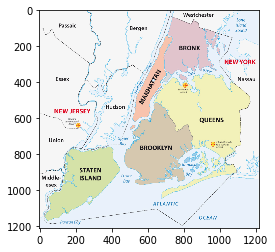

In [270]:
im = plt.imread("map_of_nyc.png")
implot = plt.imshow(im)

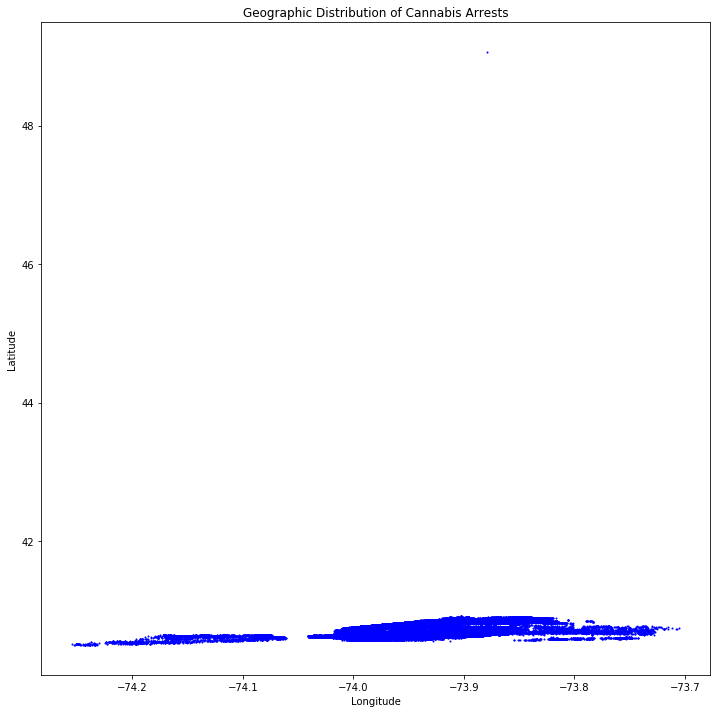

In [271]:
ax = nyc_cann.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='b', s=1, title='Geographic Distribution of Cannabis Arrests')
plt.show()

There looks to be an outlier case with Latitude outside of the boundaries of New York City that needs to be removed before a proper scatterplot can be run, as this project focuses on crimes within New York City. For situations where a significant proportion of cases are  geographic outliers, their latitude/longitude values would be trimmed to the maximum or minimum point of the range, whichever is nearest. However, because the outlier constitutes a vanishingly small proportion of the total cannabis crimes, removing this case will not bias the results. The outlier is identified by first defining a Boolean mask Series called 'lat_outlier' for cases where the Latitude is greater than 48, as the outlier can visually be identified as having a Latitude greater than 48. Next, a new integer type feature named 'lat_outlier' is created in the 'nyc_cann' DataFrame by assigning the Boolean mask Series 'lat_outlier' to it, assigning vales of '1' for the outlier and '0' for the rest of the cases.

In [272]:
lat_outlier = (nyc_cann.Latitude > 48)

In [273]:
nyc_cann['lat_outlier'] = lat_outlier.astype(int)

In [274]:
nyc_cann.query('lat_outlier == 1')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,lat_outlier
4308000,640823466,02/21/2010,19:30:00,52.0,02/21/2010,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1013626.0,3253434.0,unknown,unknown,unknown,not_transit_related,49.061308,-73.878793,"(49.061307728, -73.878793089)",PATROL BORO BRONX,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2010-02-21 19:30:00,0,2010,2,21,19,30,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


The following cell double-checks that there is only case with the complaint number in question.

In [275]:
nyc_cann.query('CMPLNT_NUM == 640823466')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,lat_outlier
4308000,640823466,02/21/2010,19:30:00,52.0,02/21/2010,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1013626.0,3253434.0,unknown,unknown,unknown,not_transit_related,49.061308,-73.878793,"(49.061307728, -73.878793089)",PATROL BORO BRONX,not_transit_related,unknown,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2010-02-21 19:30:00,0,2010,2,21,19,30,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


The outlier with complaint number 640823466 is dropped from the 'nyc_cann' DataFrame.

In [276]:
nyc_cann.drop(nyc_cann[nyc_cann.CMPLNT_NUM == 640823466].index, inplace=True)

The following cell double-checks that just the case in question is dropped by calling the .query() method on the complaint number in question. Empty query results are returned.

In [277]:
nyc_cann.query('CMPLNT_NUM == 640823466')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,lat_outlier


The .shape attribute is called to ensure that the 'nyc_cann' DataFrame's row size is one less.

In [278]:
nyc_cann.shape

(220304, 84)

Now that the geographic outlier has been removed, one can see the familiar shape of NYC emerge. 

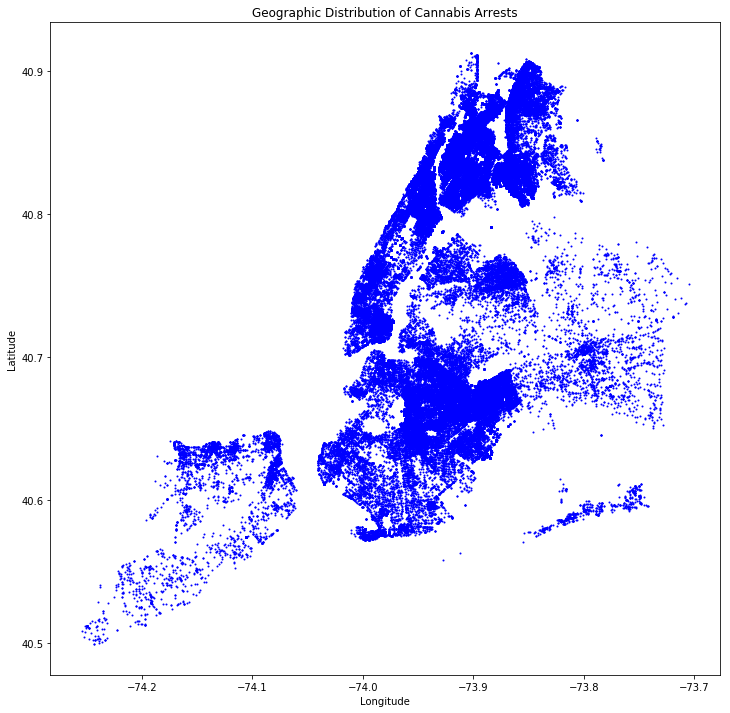

In [279]:
ax = nyc_cann.plot(x='Longitude', y='Latitude', kind='scatter', figsize=(12, 12), c='b', s=1, title='Geographic Distribution of Cannabis Arrests')

The 'lat_outlier' feature is no longer needed, so it is dropped.

In [280]:
nyc_cann = nyc_cann.drop(columns = 'lat_outlier')

## Patrol Borough

The next native feature that needs to be examined for outliers is 'PATROL_BORO', the NYPD Patrol Borough that the crime occurred in (if known). These patrol boroughs break the traditional five NYC boroughs into smaller geographic areas. The features' value counts are called, and the values are checked against the list of NYC patrol boroughs publicly available on https://www1.nyc.gov/site/nypd/stats/crime-statistics/borough-and-precinct-crime-stats.page.

In [281]:
nyc_cann['PATROL_BORO'].value_counts()

PATROL BORO BRONX            86915
PATROL BORO BKLYN NORTH      43623
PATROL BORO MAN NORTH        31032
PATROL BORO BKLYN SOUTH      27843
PATROL BORO MAN SOUTH        15544
PATROL BORO QUEENS NORTH      6743
PATROL BORO STATEN ISLAND     5629
PATROL BORO QUEENS SOUTH      2974
unknown                          1
Name: PATROL_BORO, dtype: int64

After reviewing, there are no outlying or erroneous values that need to be dropped.

## MTA Transit Stations

The next native feature that needs to be examined for outliers is 'STATION_NAME', the MTA transit station that the crime occurred in (if any). The features' value counts are called, and the values are checked against the csv file of MTA transit stations publicly available on https://data.cityofnewyork.us/api/views/kk4q-3rt2/rows.csv?accessType=DOWNLOAD.

In [282]:
nyc_cann['STATION_NAME'].value_counts()

not_transit_related               216765
42 ST.-PORT AUTHORITY BUS TERM       285
125 STREET                           129
42 ST.-TIMES SQUARE                  111
14 STREET                             97
59 ST.-COLUMBUS CIRCLE                81
116 STREET                            75
3 AVENUE-149 STREET                   66
34 ST.-PENN STATION                   60
EAST 180 STREET                       53
STILLWELL AVENUE-CONEY ISLAND         48
SIMPSON STREET                        47
UNION SQUARE                          44
W. 4 STREET                           43
PROSPECT AVENUE                       42
PELHAM PKWY.                          41
EAST 174 STREET                       41
GUN HILL ROAD                         40
42 ST.-GRAND CENTRAL                  39
CANAL STREET                          35
168 ST.-WASHINGTON HTS.               33
241 ST.-WAKEFIELD                     33
28 STREET                             33
3 AVENUE-138 STREET                   32
145 STREET      

After reviewing, there are several station names that don't show up clearly in the online source above. However, they are easily discoverable via a Google search. These station names are as follows:

1 AVENUE


2 AVENUE


5 AVENUE


72 STREET


72ND STREET


9TH STREET


BEVERLEY ROAD


BEVERLY ROAD


BROADWAY-EAST NEW YORK


PACIFIC STREET


Therefore, no outlying or erroneous values need to be dropped.

## Creating a feature for distance to closest subway station entrance

Subway station entrances can be places where people sell, purchase, consume, and get cannabis delivered in New York City, and the Open NY project has latitudes and longitudes of all NYC subway stations and their entrances (https://data.ny.gov/widgets/i9wp-a4ja). A feature is created below that determines the distance to the closest subway station for each cannabis crime.

The .csv file of all NYC Transit Subway entrances and exits is loaded and assigned to a DataFrame named 'subway_lat_lon'. Basic descriptive methods are called to inspect it.

In [283]:
subway_lat_lon = pd.read_csv("NYC_Transit_Subway_Entrance_And_Exit_Data.csv")

In [284]:
subway_lat_lon.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [285]:
len(subway_lat_lon)

1868

In [286]:
subway_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 32 columns):
Division              1868 non-null object
Line                  1868 non-null object
Station Name          1868 non-null object
Station Latitude      1868 non-null float64
Station Longitude     1868 non-null float64
Route1                1868 non-null object
Route2                1020 non-null object
Route3                494 non-null object
Route4                321 non-null object
Route5                238 non-null object
Route6                127 non-null object
Route7                80 non-null object
Route8                48 non-null float64
Route9                28 non-null float64
Route10               23 non-null float64
Route11               23 non-null float64
Entrance Type         1868 non-null object
Entry                 1868 non-null object
Exit Only             56 non-null object
Vending               1868 non-null object
Staffing              1868 non-null object


The presence of duplicate cases is checked for, using .drop_duplicates(). There are none, as the shape of the 'subway_lat_lon' DataFrame is the same before and after running the .drop_duplicates() method.

In [287]:
subway_lat_lon = subway_lat_lon.drop_duplicates()
subway_lat_lon.shape

(1868, 32)

The only columns from the 'subway_lat_lon' DataFrame that are needed to create the new 'closest subway station' feature are 'Station Name', 'Entrance Latitude', 'Entrance Longitude', and 'Corner'. Null values within these columns could prevent the proper creation of the new 'closest subway station' feature, so they are checked for within the 'subway_lat_lon' DataFrame.

In [288]:
sll_nulls = list(subway_lat_lon.columns[(subway_lat_lon.isnull().sum()>0) | (subway_lat_lon.isna().sum()>0)])
sll_nulls

['Route2',
 'Route3',
 'Route4',
 'Route5',
 'Route6',
 'Route7',
 'Route8',
 'Route9',
 'Route10',
 'Route11',
 'Exit Only',
 'Staff Hours',
 'ADA Notes',
 'North South Street',
 'East West Street',
 'Corner']

'Corner' is the only column of interest that has null values. The null values are filled with the value 'unknown'.

In [289]:
fill_na_corner = ['Corner']

In [290]:
subway_lat_lon[fill_na_corner] = subway_lat_lon[fill_na_corner].fillna(value='unknown', axis=1)

The presence of null values is checked for again. 'Corner' no longer shows up in the list of columns with null values.

In [291]:
sll_nulls = list(subway_lat_lon.columns[(subway_lat_lon.isnull().sum()>0) | (subway_lat_lon.isna().sum()>0)])
sll_nulls

['Route2',
 'Route3',
 'Route4',
 'Route5',
 'Route6',
 'Route7',
 'Route8',
 'Route9',
 'Route10',
 'Route11',
 'Exit Only',
 'Staff Hours',
 'ADA Notes',
 'North South Street',
 'East West Street']

For the greatest level of specificity, the 'Station Name' and 'Corner' features are combined to create the 'Station_Corner' feature.

In [292]:
subway_lat_lon['Station_corner'] = subway_lat_lon['Station Name'] + ' ' + subway_lat_lon['Corner']
subway_lat_lon['Station_corner'].head()

0    25th St SW
1    25th St SE
2    36th St NW
3    36th St NE
4    36th St NW
Name: Station_corner, dtype: object

A simpler DataFrame is subsetted from the 'subway_lat_lon' DataFrame with only the columns that are needed to create the new 'closest subway station' feature: 'Station_corner', 'Entrance Latitude', and 'Entrance Longitude'.

In [293]:
sll_simple = subway_lat_lon[['Station_corner', 'Entrance Latitude', 'Entrance Longitude']]
sll_simple.head()

,Station_corner,Entrance Latitude,Entrance Longitude
0,25th St SW,40.660489,-73.998220
1,25th St SE,40.660323,-73.997952
2,36th St NW,40.654676,-74.004306
3,36th St NE,40.654365,-74.004113
4,36th St NW,40.654490,-74.004499


'Type' is called on 'sll_simple' to verify its DataFrame format.

In [294]:
type(sll_simple)

pandas.core.frame.DataFrame

The subsetted DataFrame's shape is called again, and the presence of duplicate rows is checked for with the .drop_duplicates() method and the re-calling of the DataFrame's shape. 11 duplicate rows are found and removed.

In [295]:
sll_simple.shape

(1868, 3)

In [296]:
sll_simple = sll_simple.drop_duplicates()
sll_simple.shape

(1857, 3)

The complete lack of null values is verified with the .info() method and the creation of the 'slls_nulls' object, which is returned as an empty list.

In [297]:
sll_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1857 entries, 0 to 1867
Data columns (total 3 columns):
Station_corner        1857 non-null object
Entrance Latitude     1857 non-null float64
Entrance Longitude    1857 non-null float64
dtypes: float64(2), object(1)
memory usage: 58.0+ KB


In [298]:
slls_nulls = list(sll_simple.columns[(sll_simple.isnull().sum()>0) | (sll_simple.isna().sum()>0)])
slls_nulls

[]

Driving/walking/biking distance, or 'L1', features, are computed for each subway station for each row. Shortest distance ("as the crow flies"), or 'L2', features are also computed. This is done by creating a DataFrame named 'subways' with latitudes and longitudes for each subway station/corner, which is transposed for ease of use in two 'for' loops executed below. These 'for' loops create individual features storing the distance of each crime from each of the subway station/corners, both for 'L1' and 'L2' distances.

In [299]:
subways = pd.DataFrame({item['Station_corner']: {'entrance_latitude': item['Entrance Latitude'], 
                                               'entrance_longitude': item['Entrance Longitude']} 
                      for item in sll_simple.to_dict(orient='records')})
subways = subways.T
subways.head()

,entrance_latitude,entrance_longitude
25th St SW,40.660489,-73.998220
25th St SE,40.660323,-73.997952
36th St NW,40.654490,-74.004499
36th St NE,40.752232,-73.928775
45th St NE,40.649265,-74.009457


The type of the 'subways' object is verified as a DataFrame, and the .info() method is called to verify the number of rows and that there are no null values. 

In [300]:
type(subways)

pandas.core.frame.DataFrame

In [301]:
subways.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 25th St SW to Wakefield-241st St NE
Data columns (total 2 columns):
entrance_latitude     1008 non-null float64
entrance_longitude    1008 non-null float64
dtypes: float64(2)
memory usage: 23.6+ KB


The length of the 'subways' DataFrame is smaller than that of the 'sll_simple' DataFrame. That is because there is only one row in the 'subways' DataFrame for each value of 'Station_corner'. In the original .csv file of subway stations, it is seen in the next cell that is often more than one row for each station/corner. This is because there was often more than one row needed to store other data values beyond the columns needed for this notebook's purposes.

In [302]:
subway_lat_lon['Station_corner'].value_counts().head(10)

23rd St NE    12
34th St NW    11
59th St NW    11
34th St NE    11
23rd St SE    10
23rd St NW    10
14th St NW     9
14th St NE     9
34th St SW     9
23rd St SW     8
Name: Station_corner, dtype: int64

Driving/walking/biking distance, or 'L1', features, are computed for the distance of each crime from each subway station entrance. Shortest distance ("as the crow flies"), or 'L2', features are also computed below. In the 'L1' distance 'for' loop, the new features are prefixed with the string 'se_' (short for 'station entrance') and suffixed with the string '_l1' for the L1 distance.

In [303]:
for row in subways.index:
    nyc_cann['se_'+row+'_l1'] = abs(nyc_cann.Latitude - subways['entrance_latitude'][row]) + abs(nyc_cann.Longitude - subways['entrance_longitude'][row])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new 'station/corner' L1 distance features were created.

In [304]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,se_25th St SW_l1,se_25th St SE_l1,se_36th St NW_l1,se_36th St NE_l1,se_45th St NE_l1,se_45th St NW_l1,se_53rd St SW_l1,se_53rd St SE_l1,se_53rd St NW_l1,se_59th St NW_l1,se_59th St NE_l1,se_59th St SW_l1,se_59th St SE_l1,se_77th St NW_l1,se_77th St NE_l1,se_86th St SE_l1,se_86th St SW_l1,se_95th St SW_l1,se_95th St NE_l1,se_95th St NW_l1,se_9th St NE_l1,se_9th St NW_l1,se_Atlantic Av-Barclays Ctr NE_l1,se_Bay Ridge Av NW_l1,se_Bay Ridge Av NE_l1,se_DeKalb Av SE_l1,se_DeKalb Av SW_l1,se_DeKalb Av NW_l1,se_DeKalb Av NE_l1,se_Pacific St NW_l1,se_Pacific St NE_l1,se_Prospect Av NE_l1,se_Prospect Av SW_l1,se_Prospect Av SE_l1,se_Union St SE_l1,se_Union St SW_l1,se_30 Av-Grand Av SE_l1,se_30 Av-Grand Av NE_l1,se_30 Av-Grand Av SW_l1,se_30 Av-Grand Av NW_l1,se_36 Av-Washington Av SE_l1,se_36 Av-Washington Av SW_l1,se_36 Av-Washington Av NW_l1,se_39 Av-Beebe Av SE_l1,se_39 Av-Beebe Av NW_l1,se_Astoria Blvd-Hoyt Av SE_l1,se_Astoria Blvd-Hoyt Av NE_l1,se_Astoria Blvd-Hoyt Av NW_l1,se_Astoria Blvd-Hoyt Av SW_l1,se_Broadway NW_l1,se_Broadway SE_l1,se_Broadway SW_l1,se_Ditmars Blvd NW_l1,se_Ditmars Blvd NE_l1,se_7th Av SE_l1,se_7th Av SW_l1,se_Atlantic Av NE_l1,se_Av H SW_l1,se_Av H SE_l1,se_Av J NE_l1,se_Av J NW_l1,se_Av J SE_l1,se_Av M SE_l1,se_Av M NW_l1,se_Av U SE_l1,se_Beverly Rd SE_l1,se_Brighton Beach NW_l1,se_Brighton Beach SE_l1,se_Brighton Beach NE_l1,se_Brighton Beach unknown_l1,se_Brighton Beach SW_l1,se_Church Av NW_l1,se_Church Av SE_l1,se_Cortelyou Rd SE_l1,se_Kings Highway NE_l1,se_Kings Highway SE_l1,se_Kings Highway W_l1,se_Neck Rd NE_l1,se_Newkirk Av SE_l1,se_Ocean Parkway SE_l1,se_Ocean Parkway NW_l1,se_Ocean Parkway NE_l1,se_Parkside Av NE_l1,se_Parkside Av NW_l1,se_Prospect Park NE_l1,se_Prospect Park SW_l1,se_Sheepshead Bay SE_l1,se_Sheepshead Bay NE_l1,se_Stillwell Av NE_l1,se_West 8th St unknown_l1,se_23rd St SE_l1,se_23rd St NE_l1,se_23rd St NW_l1,se_28th St SE_l1,se_28th St NE_l1,se_28th St SW_l1,se_28th St NW_l1,se_34th St SE_l1,se_34th St NE_l1,se_34th St NW_l1,se_49th St SW_l1,se_49th St SE_l1,se_49th St NW_l1,se_49th St NE_l1,se_57th St SE_l1,se_57th St NW_l1,se_57th St NE_l1,se_57th St SW_l1,se_5th Av NE_l1,se_5th Av SE_l1,se_5th Av NW_l1,se_5th Av SW_l1,se_8th St NW_l1,se_8th St SW_l1,se_8th St NE_l1,se_8th St SE_l1,se_Canal St (UL) SE_l1,se_Canal St (UL) NE_l1,se_Canal St (UL) SW_l1,se_Canal St (UL) NW_l1,se_City Hall NE_l1,se_City Hall SE_l1,se_Cortlandt St SE_l1,se_Cortlandt St NE_l1,se_Court St NW_l1,se_Court St SW_l1,se_Lawrence St NE_l1,se_Lawrence St SE_l1,se_Lawrence St SW_l1,se_Lexington Av SE_l1,se_Lexington Av NE_l1,se_Lexington Av NW_l1,se_Lexington Av SW_l1,se_Prince St SE_l1,se_Prince St NE_l1,se_Prince St SW_l1,se_Prince St NW_l1,se_Rector St SE_l1,se_Rector St NE_l1,se_Rector St SW_l1,se_Rector St NW_l1,se_Times Square-42nd St SE_l1,se_Times Square-42nd St SW_l1,se_Times Square-42nd St NE_l1,se_Times Square-42nd St NW_l1,se_Union Square NE_l1,se_Union Square SE_l1,se_Union Square SW_l1,se_Whitehall St unknown_l1,se_104th St-102nd St SE_l1,se_104th St-102nd St NE_l1,se_111th St SE_l1,se_111th St NE_l1,se_1

In the 'L2' distance 'for' loop, the new features are prefixed with the string 'se_' (short for 'station entrance') and suffixed with the string '_l2' for the L2 distance.

In [305]:
for row in subways.index:
    nyc_cann['se_'+row+'_l2'] = ((nyc_cann.Latitude - subways['entrance_latitude'][row])**2 + (nyc_cann.Longitude - subways['entrance_longitude'][row])**2)**0.5

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new 'station/corner' L2 distance features were created.

In [306]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,se_25th St SW_l1,se_25th St SE_l1,se_36th St NW_l1,se_36th St NE_l1,se_45th St NE_l1,se_45th St NW_l1,se_53rd St SW_l1,se_53rd St SE_l1,se_53rd St NW_l1,se_59th St NW_l1,se_59th St NE_l1,se_59th St SW_l1,se_59th St SE_l1,se_77th St NW_l1,se_77th St NE_l1,se_86th St SE_l1,se_86th St SW_l1,se_95th St SW_l1,se_95th St NE_l1,se_95th St NW_l1,se_9th St NE_l1,se_9th St NW_l1,se_Atlantic Av-Barclays Ctr NE_l1,se_Bay Ridge Av NW_l1,se_Bay Ridge Av NE_l1,se_DeKalb Av SE_l1,se_DeKalb Av SW_l1,se_DeKalb Av NW_l1,se_DeKalb Av NE_l1,se_Pacific St NW_l1,se_Pacific St NE_l1,se_Prospect Av NE_l1,se_Prospect Av SW_l1,se_Prospect Av SE_l1,se_Union St SE_l1,se_Union St SW_l1,se_30 Av-Grand Av SE_l1,se_30 Av-Grand Av NE_l1,se_30 Av-Grand Av SW_l1,se_30 Av-Grand Av NW_l1,se_36 Av-Washington Av SE_l1,se_36 Av-Washington Av SW_l1,se_36 Av-Washington Av NW_l1,se_39 Av-Beebe Av SE_l1,se_39 Av-Beebe Av NW_l1,se_Astoria Blvd-Hoyt Av SE_l1,se_Astoria Blvd-Hoyt Av NE_l1,se_Astoria Blvd-Hoyt Av NW_l1,se_Astoria Blvd-Hoyt Av SW_l1,se_Broadway NW_l1,se_Broadway SE_l1,se_Broadway SW_l1,se_Ditmars Blvd NW_l1,se_Ditmars Blvd NE_l1,se_7th Av SE_l1,se_7th Av SW_l1,se_Atlantic Av NE_l1,se_Av H SW_l1,se_Av H SE_l1,se_Av J NE_l1,se_Av J NW_l1,se_Av J SE_l1,se_Av M SE_l1,se_Av M NW_l1,se_Av U SE_l1,se_Beverly Rd SE_l1,se_Brighton Beach NW_l1,se_Brighton Beach SE_l1,se_Brighton Beach NE_l1,se_Brighton Beach unknown_l1,se_Brighton Beach SW_l1,se_Church Av NW_l1,se_Church Av SE_l1,se_Cortelyou Rd SE_l1,se_Kings Highway NE_l1,se_Kings Highway SE_l1,se_Kings Highway W_l1,se_Neck Rd NE_l1,se_Newkirk Av SE_l1,se_Ocean Parkway SE_l1,se_Ocean Parkway NW_l1,se_Ocean Parkway NE_l1,se_Parkside Av NE_l1,se_Parkside Av NW_l1,se_Prospect Park NE_l1,se_Prospect Park SW_l1,se_Sheepshead Bay SE_l1,se_Sheepshead Bay NE_l1,se_Stillwell Av NE_l1,se_West 8th St unknown_l1,se_23rd St SE_l1,se_23rd St NE_l1,se_23rd St NW_l1,se_28th St SE_l1,se_28th St NE_l1,se_28th St SW_l1,se_28th St NW_l1,se_34th St SE_l1,se_34th St NE_l1,se_34th St NW_l1,se_49th St SW_l1,se_49th St SE_l1,se_49th St NW_l1,se_49th St NE_l1,se_57th St SE_l1,se_57th St NW_l1,se_57th St NE_l1,se_57th St SW_l1,se_5th Av NE_l1,se_5th Av SE_l1,se_5th Av NW_l1,se_5th Av SW_l1,se_8th St NW_l1,se_8th St SW_l1,se_8th St NE_l1,se_8th St SE_l1,se_Canal St (UL) SE_l1,se_Canal St (UL) NE_l1,se_Canal St (UL) SW_l1,se_Canal St (UL) NW_l1,se_City Hall NE_l1,se_City Hall SE_l1,se_Cortlandt St SE_l1,se_Cortlandt St NE_l1,se_Court St NW_l1,se_Court St SW_l1,se_Lawrence St NE_l1,se_Lawrence St SE_l1,se_Lawrence St SW_l1,se_Lexington Av SE_l1,se_Lexington Av NE_l1,se_Lexington Av NW_l1,se_Lexington Av SW_l1,se_Prince St SE_l1,se_Prince St NE_l1,se_Prince St SW_l1,se_Prince St NW_l1,se_Rector St SE_l1,se_Rector St NE_l1,se_Rector St SW_l1,se_Rector St NW_l1,se_Times Square-42nd St SE_l1,se_Times Square-42nd St SW_l1,se_Times Square-42nd St NE_l1,se_Times Square-42nd St NW_l1,se_Union Square NE_l1,se_Union Square SE_l1,se_Union Square SW_l1,se_Whitehall St unknown_l1,se_104th St-102nd St SE_l1,se_104th St-102nd St NE_l1,se_111th St SE_l1,se_111th St NE_l1,se_1

A list is created of all the new 'station/corner' L1 distance features.

In [307]:
l1_subway_features = list(nyc_cann.columns[nyc_cann.columns.str.startswith('se') & nyc_cann.columns.str.endswith('l1')])
l1_subway_features[0:5]

['se_25th St SW_l1',
 'se_25th St SE_l1',
 'se_36th St NW_l1',
 'se_36th St NE_l1',
 'se_45th St NE_l1']

The minimum value across all of the new 'station_corner' L1 distance features is assigned to the object min_distl1.

In [308]:
min_distsl1 = nyc_cann[l1_subway_features].min(axis=1).values
min_distsl1

array([0.01921147, 0.01011638, 0.00508113, ..., 0.00238248, 0.00661698,
       0.01991542])

A new feature is created in the 'nyc_cann' DataFrame which stores the latitude/longitude distance of each cannabis crime to the closest subway station.

In [309]:
nyc_cann['closest_subway_distance_l1'] = min_distsl1

The first row's values of the 'nyc_cann' DataFrame are called to verify that the new closest L1 subway distance feature was created.

In [310]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,se_25th St SW_l1,se_25th St SE_l1,se_36th St NW_l1,se_36th St NE_l1,se_45th St NE_l1,se_45th St NW_l1,se_53rd St SW_l1,se_53rd St SE_l1,se_53rd St NW_l1,se_59th St NW_l1,se_59th St NE_l1,se_59th St SW_l1,se_59th St SE_l1,se_77th St NW_l1,se_77th St NE_l1,se_86th St SE_l1,se_86th St SW_l1,se_95th St SW_l1,se_95th St NE_l1,se_95th St NW_l1,se_9th St NE_l1,se_9th St NW_l1,se_Atlantic Av-Barclays Ctr NE_l1,se_Bay Ridge Av NW_l1,se_Bay Ridge Av NE_l1,se_DeKalb Av SE_l1,se_DeKalb Av SW_l1,se_DeKalb Av NW_l1,se_DeKalb Av NE_l1,se_Pacific St NW_l1,se_Pacific St NE_l1,se_Prospect Av NE_l1,se_Prospect Av SW_l1,se_Prospect Av SE_l1,se_Union St SE_l1,se_Union St SW_l1,se_30 Av-Grand Av SE_l1,se_30 Av-Grand Av NE_l1,se_30 Av-Grand Av SW_l1,se_30 Av-Grand Av NW_l1,se_36 Av-Washington Av SE_l1,se_36 Av-Washington Av SW_l1,se_36 Av-Washington Av NW_l1,se_39 Av-Beebe Av SE_l1,se_39 Av-Beebe Av NW_l1,se_Astoria Blvd-Hoyt Av SE_l1,se_Astoria Blvd-Hoyt Av NE_l1,se_Astoria Blvd-Hoyt Av NW_l1,se_Astoria Blvd-Hoyt Av SW_l1,se_Broadway NW_l1,se_Broadway SE_l1,se_Broadway SW_l1,se_Ditmars Blvd NW_l1,se_Ditmars Blvd NE_l1,se_7th Av SE_l1,se_7th Av SW_l1,se_Atlantic Av NE_l1,se_Av H SW_l1,se_Av H SE_l1,se_Av J NE_l1,se_Av J NW_l1,se_Av J SE_l1,se_Av M SE_l1,se_Av M NW_l1,se_Av U SE_l1,se_Beverly Rd SE_l1,se_Brighton Beach NW_l1,se_Brighton Beach SE_l1,se_Brighton Beach NE_l1,se_Brighton Beach unknown_l1,se_Brighton Beach SW_l1,se_Church Av NW_l1,se_Church Av SE_l1,se_Cortelyou Rd SE_l1,se_Kings Highway NE_l1,se_Kings Highway SE_l1,se_Kings Highway W_l1,se_Neck Rd NE_l1,se_Newkirk Av SE_l1,se_Ocean Parkway SE_l1,se_Ocean Parkway NW_l1,se_Ocean Parkway NE_l1,se_Parkside Av NE_l1,se_Parkside Av NW_l1,se_Prospect Park NE_l1,se_Prospect Park SW_l1,se_Sheepshead Bay SE_l1,se_Sheepshead Bay NE_l1,se_Stillwell Av NE_l1,se_West 8th St unknown_l1,se_23rd St SE_l1,se_23rd St NE_l1,se_23rd St NW_l1,se_28th St SE_l1,se_28th St NE_l1,se_28th St SW_l1,se_28th St NW_l1,se_34th St SE_l1,se_34th St NE_l1,se_34th St NW_l1,se_49th St SW_l1,se_49th St SE_l1,se_49th St NW_l1,se_49th St NE_l1,se_57th St SE_l1,se_57th St NW_l1,se_57th St NE_l1,se_57th St SW_l1,se_5th Av NE_l1,se_5th Av SE_l1,se_5th Av NW_l1,se_5th Av SW_l1,se_8th St NW_l1,se_8th St SW_l1,se_8th St NE_l1,se_8th St SE_l1,se_Canal St (UL) SE_l1,se_Canal St (UL) NE_l1,se_Canal St (UL) SW_l1,se_Canal St (UL) NW_l1,se_City Hall NE_l1,se_City Hall SE_l1,se_Cortlandt St SE_l1,se_Cortlandt St NE_l1,se_Court St NW_l1,se_Court St SW_l1,se_Lawrence St NE_l1,se_Lawrence St SE_l1,se_Lawrence St SW_l1,se_Lexington Av SE_l1,se_Lexington Av NE_l1,se_Lexington Av NW_l1,se_Lexington Av SW_l1,se_Prince St SE_l1,se_Prince St NE_l1,se_Prince St SW_l1,se_Prince St NW_l1,se_Rector St SE_l1,se_Rector St NE_l1,se_Rector St SW_l1,se_Rector St NW_l1,se_Times Square-42nd St SE_l1,se_Times Square-42nd St SW_l1,se_Times Square-42nd St NE_l1,se_Times Square-42nd St NW_l1,se_Union Square NE_l1,se_Union Square SE_l1,se_Union Square SW_l1,se_Whitehall St unknown_l1,se_104th St-102nd St SE_l1,se_104th St-102nd St NE_l1,se_111th St SE_l1,se_111th St NE_l1,se_1

A list is created of all the new 'station/corner' L2 distance features.

In [311]:
l2_subway_features = list(nyc_cann.columns[nyc_cann.columns.str.startswith('se') & nyc_cann.columns.str.endswith('l2')])
l2_subway_features[0:5]

['se_25th St SW_l2',
 'se_25th St SE_l2',
 'se_36th St NW_l2',
 'se_36th St NE_l2',
 'se_45th St NE_l2']

The minimum value across all of the new 'station_corner' L2 distance features is assigned to the object min_distl1.

In [312]:
min_distsl2 = nyc_cann[l2_subway_features].min(axis=1).values
min_distsl2

array([0.01714471, 0.00900231, 0.00410846, ..., 0.00194155, 0.00475523,
       0.01777964])

In [313]:
nyc_cann['closest_subway_distance_l2'] = min_distsl2

The first row's values of the 'nyc_cann' DataFrame are called to verify that the new closest L2 subway distance feature was created.

In [314]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,se_25th St SW_l1,se_25th St SE_l1,se_36th St NW_l1,se_36th St NE_l1,se_45th St NE_l1,se_45th St NW_l1,se_53rd St SW_l1,se_53rd St SE_l1,se_53rd St NW_l1,se_59th St NW_l1,se_59th St NE_l1,se_59th St SW_l1,se_59th St SE_l1,se_77th St NW_l1,se_77th St NE_l1,se_86th St SE_l1,se_86th St SW_l1,se_95th St SW_l1,se_95th St NE_l1,se_95th St NW_l1,se_9th St NE_l1,se_9th St NW_l1,se_Atlantic Av-Barclays Ctr NE_l1,se_Bay Ridge Av NW_l1,se_Bay Ridge Av NE_l1,se_DeKalb Av SE_l1,se_DeKalb Av SW_l1,se_DeKalb Av NW_l1,se_DeKalb Av NE_l1,se_Pacific St NW_l1,se_Pacific St NE_l1,se_Prospect Av NE_l1,se_Prospect Av SW_l1,se_Prospect Av SE_l1,se_Union St SE_l1,se_Union St SW_l1,se_30 Av-Grand Av SE_l1,se_30 Av-Grand Av NE_l1,se_30 Av-Grand Av SW_l1,se_30 Av-Grand Av NW_l1,se_36 Av-Washington Av SE_l1,se_36 Av-Washington Av SW_l1,se_36 Av-Washington Av NW_l1,se_39 Av-Beebe Av SE_l1,se_39 Av-Beebe Av NW_l1,se_Astoria Blvd-Hoyt Av SE_l1,se_Astoria Blvd-Hoyt Av NE_l1,se_Astoria Blvd-Hoyt Av NW_l1,se_Astoria Blvd-Hoyt Av SW_l1,se_Broadway NW_l1,se_Broadway SE_l1,se_Broadway SW_l1,se_Ditmars Blvd NW_l1,se_Ditmars Blvd NE_l1,se_7th Av SE_l1,se_7th Av SW_l1,se_Atlantic Av NE_l1,se_Av H SW_l1,se_Av H SE_l1,se_Av J NE_l1,se_Av J NW_l1,se_Av J SE_l1,se_Av M SE_l1,se_Av M NW_l1,se_Av U SE_l1,se_Beverly Rd SE_l1,se_Brighton Beach NW_l1,se_Brighton Beach SE_l1,se_Brighton Beach NE_l1,se_Brighton Beach unknown_l1,se_Brighton Beach SW_l1,se_Church Av NW_l1,se_Church Av SE_l1,se_Cortelyou Rd SE_l1,se_Kings Highway NE_l1,se_Kings Highway SE_l1,se_Kings Highway W_l1,se_Neck Rd NE_l1,se_Newkirk Av SE_l1,se_Ocean Parkway SE_l1,se_Ocean Parkway NW_l1,se_Ocean Parkway NE_l1,se_Parkside Av NE_l1,se_Parkside Av NW_l1,se_Prospect Park NE_l1,se_Prospect Park SW_l1,se_Sheepshead Bay SE_l1,se_Sheepshead Bay NE_l1,se_Stillwell Av NE_l1,se_West 8th St unknown_l1,se_23rd St SE_l1,se_23rd St NE_l1,se_23rd St NW_l1,se_28th St SE_l1,se_28th St NE_l1,se_28th St SW_l1,se_28th St NW_l1,se_34th St SE_l1,se_34th St NE_l1,se_34th St NW_l1,se_49th St SW_l1,se_49th St SE_l1,se_49th St NW_l1,se_49th St NE_l1,se_57th St SE_l1,se_57th St NW_l1,se_57th St NE_l1,se_57th St SW_l1,se_5th Av NE_l1,se_5th Av SE_l1,se_5th Av NW_l1,se_5th Av SW_l1,se_8th St NW_l1,se_8th St SW_l1,se_8th St NE_l1,se_8th St SE_l1,se_Canal St (UL) SE_l1,se_Canal St (UL) NE_l1,se_Canal St (UL) SW_l1,se_Canal St (UL) NW_l1,se_City Hall NE_l1,se_City Hall SE_l1,se_Cortlandt St SE_l1,se_Cortlandt St NE_l1,se_Court St NW_l1,se_Court St SW_l1,se_Lawrence St NE_l1,se_Lawrence St SE_l1,se_Lawrence St SW_l1,se_Lexington Av SE_l1,se_Lexington Av NE_l1,se_Lexington Av NW_l1,se_Lexington Av SW_l1,se_Prince St SE_l1,se_Prince St NE_l1,se_Prince St SW_l1,se_Prince St NW_l1,se_Rector St SE_l1,se_Rector St NE_l1,se_Rector St SW_l1,se_Rector St NW_l1,se_Times Square-42nd St SE_l1,se_Times Square-42nd St SW_l1,se_Times Square-42nd St NE_l1,se_Times Square-42nd St NW_l1,se_Union Square NE_l1,se_Union Square SE_l1,se_Union Square SW_l1,se_Whitehall St unknown_l1,se_104th St-102nd St SE_l1,se_104th St-102nd St NE_l1,se_111th St SE_l1,se_111th St NE_l1,se_1

The individual features that store the distance of each crime to every subway station are no longer needed, now that the minimum value of these distances has been stored in the 'closest_subway_distance_l2' and 'closest_subway_distance_l2' features. Therefore, they are dropped.

In [314]:
nyc_cann = nyc_cann.drop(columns=l1_subway_features)

In [315]:
nyc_cann = nyc_cann.drop(columns=l2_subway_features)

The first five rows' values of the 'nyc_cann' DataFrame are called to verify that all of the individual subway entrance distance features were removed.

In [316]:
nyc_cann.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,closest_subway_distance_l1,closest_subway_distance_l2
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019211,0.017145
536,145023256,12/31/2018,17:00:00,26.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,997349.0,235298.0,18-24,BLACK,M,not_transit_related,40.812513,-73.952681,"(40.812512958, -73.952680664)",PATROL BORO MAN NORTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 17:00:00,0,2018,12,31,17,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.010116,0.009002
899,286264352,12/30/2018,17:25:00,109.0,12/30/2018,678,MISCELLANEOUS PENAL LAW,566.0,"MARIJUANA, POSSESSION",COMPLETED,VIOLATION,QUEENS,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1030153.0,215586.0,25-44,BLACK,M,not_transit_related,40.758299,-73.834309,"(40.758299326, -73.834309457)",PATROL BORO QUEENS NORTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,0,1,0,0,1,0,0,0,0,2018-12-30 17:25:00,0,2018,12,30,17,25,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005081,0.004108
1114,606039781,12/30/2018,00:35:00,6.0,12/30/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,MANHATTAN,unknown,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,unknown,not_housing_devpt_crime,983985.0,205857.0,25-44,WHITE,M,2,40.731715,-74.000958,"(40.731714801, -74.000957613)",PATROL BORO MAN SOUTH,W. 4 STREET,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-30 00:35:00,0,2018,12,30,0,35,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000880,0.000677
1148,698392952,12/30/2018,17:40:00,44.0,12/30/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,1008924.0,245473.0,25-44,WHITE HISPANIC,M,not_transit_related,40.840416,-73.910828,"(40.840415681, -73.910828006)",PATROL BORO BRONX,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-30 17:40:00,0,2018,12,30,17,40,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002580,0.002027


The various DataFrames, objects and lists that made up the two new features are deleted in order to free up computational memory.

In [317]:
del subway_lat_lon

In [318]:
del sll_nulls

In [319]:
del fill_na_corner

In [320]:
del sll_simple

In [321]:
del subways

# Creation of Continuous Geographic Features

The following section encodes the distance of each cannabis crime from prominent NYC landmarks into continuous data features. All latitudes and longitudes were found from Google searches. Driving/walking/biking distance, or 'L1', features, are computed. Shortest distance ("as the crow flies"), or 'L2', features are also computed. This is done by creating a DataFrame with latitudes and longitudes for each NYC landmark, which is transposed for ease of use in two 'for' loops executed below. These 'for' loops create individual features storing the distance of each crime from each of the landmarks, both for 'L1' and 'L2' distances. The longitude is programmatically assigned a negative value because NYC has negative longitude as it is west of the Prime Meridian.

The series of landmarks, and their respective abbreviations, are as follows:

World Trade Center - wtc


New York Stock Exchange - nyse


Brooklyn Bridge - bk_bridge


City Hall - city_hall


Manhattan Bridge - manh_bridge


Williamsburg Bridge - will_bridge


Washington Square Park - wash_sq_park


Union Square - union_sq


Penn Station - penn_station


Times Square - times_sq


Rockefeller Center - rock_center


Empire State Building - empire_st_bldg


Lincoln Center - lincoln_ctr


Central Park - central_pk


Apollo Theatre - apollo_th


Yankee Stadium - yankee_stad


NY Mets Stadium - mets_stad


Center of Queens Borough - queens


Prospect Park - prospect_pk


Downtown Brooklyn - downtown_bk


Staten Island Ferry - si_ferry


NY Port Authority Bus Station - port_authority


New York Police Department Headquarters - nypd_hq


Metropolitan Detention Center - mdc


Riker's Island - rikers


New York Supreme Court - nysc

In [322]:
lat_long = pd.DataFrame(dict(wtc = dict(lat= 40.7127, lon= 74.0134), nyse = dict(lat= 40.706877, lon= 74.011265), 
                        bk_bridge = dict(lat= 40.7061, lon= 73.9969), city_hall = dict(lat= 40.7128, lon= 74.0061), 
                        manh_bridge = dict(lat= 40.7075, lon= 73.9908), will_bridge = dict(lat= 40.7136, lon= 73.9724),  
                        wash_sq_park = dict(lat= 40.7308, lon= 73.9973), union_sq = dict(lat= 40.7359, lon= 73.9911), 
                        penn_station = dict(lat= 40.7506, lon= 73.9935), times_sq = dict(lat= 40.7580, lon= 73.9855), 
                        rock_center = dict(lat= 40.7587, lon= 73.9787), empire_st_bldg = dict(lat= 40.7484, lon= 73.9857), 
                        lincoln_ctr = dict(lat= 40.7725, lon= 73.9835), central_pk = dict(lat= 40.7829, lon= 73.9654), 
                        apollo_th = dict(lat= 40.8100, lon= 73.9501), yankee_stad = dict(lat= 40.8296, lon= 73.9262), 
                        mets_stad = dict(lat= 40.7571, lon= 73.8458), queens = dict(lat= 40.7282, lon= 73.7949), 
                        prospect_pk = dict(lat= 40.6602, lon= 73.9690), downtown_bk = dict(lat= 40.6961, lon= 73.9845),
                        si_ferry = dict(lat= 40.671946, lon= 74.042495), port_authority = dict(lat= 40.7569, lon= 73.9903), 
                        nypd_hq = dict(lat= 40.7121, lon= 74.0019), mdc = dict(lat= 40.6599, lon= 74.0038), 
                        rikers = dict(lat= 40.7931, lon= 73.8860), nysc = dict(lat= 40.7144, lon= 74.0020)))
lat_long = lat_long.T
lat_long['lon'] = - lat_long['lon']
lat_long

,lat,lon
wtc,40.712700,-74.013400
nyse,40.706877,-74.011265
bk_bridge,40.706100,-73.996900
city_hall,40.712800,-74.006100
manh_bridge,40.707500,-73.990800
will_bridge,40.713600,-73.972400
wash_sq_park,40.730800,-73.997300
union_sq,40.735900,-73.991100
penn_station,40.750600,-73.993500
times_sq,40.758000,-73.985500


In [323]:
for name in lat_long.index:
    nyc_cann[name+'_l1'] = abs(nyc_cann.Latitude - lat_long['lat'][name]) + abs(nyc_cann.Longitude - lat_long['lon'][name])

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new continuous geographic L1 features were created.

In [324]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,closest_subway_distance_l1,closest_subway_distance_l2,wtc_l1,nyse_l1,bk_bridge_l1,city_hall_l1,manh_bridge_l1,will_bridge_l1,wash_sq_park_l1,union_sq_l1,penn_station_l1,times_sq_l1,rock_center_l1,empire_st_bldg_l1,lincoln_ctr_l1,central_pk_l1,apollo_th_l1,yankee_stad_l1,mets_stad_l1,queens_l1,prospect_pk_l1,downtown_bk_l1,si_ferry_l1,port_authority_l1,nypd_hq_l1,mdc_l1,rikers_l1,nysc_l1
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019211,0.017145,0.107947,0.104259,0.117847,0.115347,0.125347,0.149847,0.142147,0.153447,0.165747,0.181147,0.188647,0.171347,0.197647,0.226147,0.268547,0.312047,0.319947,0.341947,0.099847,0.120247,0.092092,0.175247,0.118847,0.064747,0.315747,0.121047


In [325]:
for name in lat_long.index:
    nyc_cann[name+'_l2'] = ((nyc_cann.Latitude - lat_long['lat'][name])**2 + (nyc_cann.Longitude - lat_long['lon'][name])**2)**0.5

The first row's values of the 'nyc_cann' DataFrame are called to verify that all of the new continuous geographic L2 features were created.

In [326]:
nyc_cann.head(1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,possession,sales,misdemeanor,violation,felony,misd_poss,viol_poss,felony_poss,misd_sales,viol_sales,felony_sales,date_time_start,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,closest_subway_distance_l1,closest_subway_distance_l2,wtc_l1,nyse_l1,bk_bridge_l1,city_hall_l1,manh_bridge_l1,will_bridge_l1,wash_sq_park_l1,union_sq_l1,penn_station_l1,times_sq_l1,rock_center_l1,empire_st_bldg_l1,lincoln_ctr_l1,central_pk_l1,apollo_th_l1,yankee_stad_l1,mets_stad_l1,queens_l1,prospect_pk_l1,downtown_bk_l1,si_ferry_l1,port_authority_l1,nypd_hq_l1,mdc_l1,rikers_l1,nysc_l1,wtc_l2,nyse_l2,bk_bridge_l2,city_hall_l2,manh_bridge_l2,will_bridge_l2,wash_sq_park_l2,union_sq_l2,penn_station_l2,times_sq_l2,rock_center_l2,empire_st_bldg_l2,lincoln_ctr_l2,central_pk_l2,apollo_th_l2,yankee_stad_l2,mets_stad_l2,queens_l2,prospect_pk_l2,downtown_bk_l2,si_ferry_l2,port_authority_l2,nypd_hq_l2,mdc_l2,rikers_l2,nysc_l2
148,498164466,12/31/2018,21:55:00,62.0,12/31/2018,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,BROOKLYN,unknown,STREET,N.Y. POLICE DEPT,unknown,not_housing_devpt_crime,979947.0,160366.0,25-44,BLACK HISPANIC,M,not_transit_related,40.606851,-74.015498,"(40.60685112, -74.015498354)",PATROL BORO BKLYN SOUTH,not_transit_related,UNKNOWN,UNKNOWN,E,1,0,1,0,0,1,0,0,0,0,0,2018-12-31 21:55:00,0,2018,12,31,21,55,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019211,0.017145,0.107947,0.104259,0.117847,0.115347,0.125347,0.149847,0.142147,0.153447,0.165747,0.181147,0.188647,0.171347,0.197647,0.226147,0.268547,0.312047,0.319947,0.341947,0.099847,0.120247,0.092092,0.175247,0.118847,0.064747,0.315747,0.121047,0.10587,0.100115,0.100976,0.106365,0.103635,0.115121,0.125278,0.131335,0.145422,0.154097,0.156244,0.144651,0.168711,0.183038,0.213416,0.239982,0.226654,0.251772,0.070769,0.094479,0.070471,0.15215,0.106124,0.054323,0.226845,0.108393


# Recoding and Cleaning Age, Race, and Sex Features

The next section recodes unclear values to 'unknown' for the suspect and victim age group, race, and sex features. First, the value counts are run for each feature. Then, a cleaned version of the feature is created by mapping unusual values to 'unknown'. Finally, value counts are called on the cleaned version of the feature to ensure all unusual values have been mapped to 'unknown'.

In [327]:
nyc_cann['SUSP_AGE_GROUP'].value_counts()

unknown    185500
25-44       15465
18-24       14169
45-64        2856
<18          2186
65+            87
UNKNOWN        40
938             1
Name: SUSP_AGE_GROUP, dtype: int64

In [328]:
nyc_cann['SUSP_AGE_GROUP_cleaned'] = nyc_cann['SUSP_AGE_GROUP'].map({'<18': '<18', '18-24': '18-24', 
                                                                     '25-44': '25-44', '45-64': '45-64', 
                                                                     '65+': '65+', 'unknown': 'unknown', 
                                                                     'UNKNOWN': 'unknown', '938': 'unknown'})

In [329]:
nyc_cann['SUSP_AGE_GROUP_cleaned'].value_counts()

unknown    185541
25-44       15465
18-24       14169
45-64        2856
<18          2186
65+            87
Name: SUSP_AGE_GROUP_cleaned, dtype: int64

In [330]:
nyc_cann['SUSP_RACE'].value_counts()

unknown                           185042
BLACK                              17810
WHITE HISPANIC                      9467
BLACK HISPANIC                      3874
WHITE                               2789
ASIAN / PACIFIC ISLANDER             813
UNKNOWN                              425
AMERICAN INDIAN/ALASKAN NATIVE        84
Name: SUSP_RACE, dtype: int64

In [331]:
nyc_cann['SUSP_RACE_cleaned'] = nyc_cann['SUSP_RACE'].map({'BLACK': 'BLACK', 'WHITE HISPANIC': 'WHITE HISPANIC', 
                                              'BLACK HISPANIC': 'BLACK HISPANIC', 'WHITE': 'WHITE',
                                              'ASIAN / PACIFIC ISLANDER': 'ASIAN / PACIFIC ISLANDER', 
                                              'unknown': 'unknown','UNKNOWN': 'unknown', 
                                              'AMERICAN INDIAN/ALASKAN NATIVE': 'AMERICAN INDIAN/ALASKAN NATIVE'})

In [332]:
nyc_cann['SUSP_RACE_cleaned'].value_counts()

unknown                           185467
BLACK                              17810
WHITE HISPANIC                      9467
BLACK HISPANIC                      3874
WHITE                               2789
ASIAN / PACIFIC ISLANDER             813
AMERICAN INDIAN/ALASKAN NATIVE        84
Name: SUSP_RACE_cleaned, dtype: int64

In [333]:
nyc_cann['SUSP_SEX'].value_counts()

unknown    185079
M           31502
F            3639
U              84
Name: SUSP_SEX, dtype: int64

In [334]:
nyc_cann['SUSP_SEX_cleaned'] = nyc_cann['SUSP_SEX'].map({'M': 'M', 'F': 'F', 'U': 'unknown', 
                                                         'unknown': 'unknown'})

In [335]:
nyc_cann['SUSP_SEX_cleaned'].value_counts()

unknown    185163
M           31502
F            3639
Name: SUSP_SEX_cleaned, dtype: int64

In [336]:
nyc_cann['VIC_AGE_GROUP'].value_counts()

unknown    187860
UNKNOWN     32040
25-44         178
45-64         102
18-24          73
<18            36
65+            14
1004            1
Name: VIC_AGE_GROUP, dtype: int64

In [337]:
nyc_cann['VIC_AGE_GROUP_cleaned'] = nyc_cann['VIC_AGE_GROUP'].map({'UNKNOWN': 'unknown', 'unknown': 'unknown', 
                                                                   '<18': '<18', '18-24': '18-24', 
                                                                   '25-44': '25-44', '45-64': '45-64', 
                                                                   '65+': '65+', '1004': 'unknown'})

In [338]:
nyc_cann['VIC_AGE_GROUP_cleaned'].value_counts()

unknown    219901
25-44         178
45-64         102
18-24          73
<18            36
65+            14
Name: VIC_AGE_GROUP_cleaned, dtype: int64

In [339]:
nyc_cann['VIC_RACE'].value_counts()

UNKNOWN                           219612
BLACK                                308
WHITE HISPANIC                       146
WHITE                                 99
unknown                               54
BLACK HISPANIC                        46
ASIAN / PACIFIC ISLANDER              35
AMERICAN INDIAN/ALASKAN NATIVE         4
Name: VIC_RACE, dtype: int64

In [340]:
nyc_cann['VIC_RACE_cleaned'] = nyc_cann['VIC_RACE'].map({'UNKNOWN': 'unknown', 'BLACK': 'BLACK', 'WHITE HISPANIC': 'WHITE HISPANIC',
                                            'WHITE': 'WHITE', 'BLACK HISPANIC': 'BLACK HISPANIC', 
                                            'ASIAN / PACIFIC ISLANDER': 'ASIAN / PACIFIC ISLANDER', 
                                            'AMERICAN INDIAN/ALASKAN NATIVE': 'AMERICAN INDIAN/ALASKAN NATIVE', 
                                            'unknown': 'unknown'})

In [341]:
nyc_cann['VIC_RACE_cleaned'].value_counts()

unknown                           219666
BLACK                                308
WHITE HISPANIC                       146
WHITE                                 99
BLACK HISPANIC                        46
ASIAN / PACIFIC ISLANDER              35
AMERICAN INDIAN/ALASKAN NATIVE         4
Name: VIC_RACE_cleaned, dtype: int64

In [342]:
nyc_cann['VIC_SEX'].value_counts()

E          219354
M             397
D             343
F             156
unknown        54
Name: VIC_SEX, dtype: int64

In [343]:
nyc_cann['VIC_SEX_cleaned'] = nyc_cann['VIC_SEX'].map({'E': 'unknown', 'M': 'M', 'D': 'unknown', 'F': 'F', 
                                                      'unknown': 'unknown'})

In [344]:
nyc_cann['VIC_SEX_cleaned'].value_counts()

unknown    219751
M             397
F             156
Name: VIC_SEX_cleaned, dtype: int64

The old uncleaned suspect and victim age group, race, and sex features are dropped from the DataFrame as they are not needed.

In [345]:
nyc_cann = nyc_cann.drop(columns=['SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'])

# Exporting of DataFrame for EDA

The .get_dummies() method below will convert categorical features into binary features for machine learning classification purposes, but the categorical features will be lost with this method. For ease of use in doing visual and statistical EDA, the version of the DataFrame with categorical features intact are exported below. Duplicate rows are first looked for to make sure no duplication accidentally occurred above, as duplicate rows can be a source of machine learning leakage. There are no duplicate rows.

In [346]:
nyc_cann.shape

(220304, 137)

In [347]:
nyc_cann = nyc_cann.drop_duplicates()
nyc_cann.shape

(220304, 137)

In [348]:
nyc_cann.to_csv('nyc_cann_for_EDA.csv')

In order to conduct EDA between the five different levels of cannabis crimes for just those cases with the suspect's race reported (n=34,837), a subsetted DataFrame of nyc_cann is created and exported, called "nyc_cann_race_reported".

In [349]:
nyc_cann_race_reported = nyc_cann[nyc_cann.SUSP_RACE_cleaned != 'unknown']

In [350]:
nyc_cann_race_reported.shape

(34837, 137)

In [351]:
nyc_cann_race_reported.to_csv('nyc_cann_EDA_race_reported.csv')

# Sampling and Exporting of DataFrame for Hypothesis Testing

The hypothesis testing done in the Statistical Data Analysis notebook requires a sample of all NYC crimes. Now that the cannabis crime data has been cleaned, a 10% sample is taken and exported to a .csv file. The same will be done in the non-cannabis crime data cleaning notebook, and the two sample DataFrames will be concatenated in the Statistical Data Analysis notebook.

In [352]:
nyc_cann_HT_sample = nyc_cann.sample(n=22030, random_state=42, axis=0)

In [353]:
nyc_cann_HT_sample.to_csv('nyc_cann_HT_sample.csv')

# Creation of DataFrame for Machine Learning Classification Models of Types of Cannabis Crimes

The remaining categorical features will be transformed into individual binary features via the .get_dummies() method below, so that each value of categorical features has its own binary feature. This is done for later machine learning classification of different cannabis crime types within the universe of NYC cannabis crimes between 2006 and 2018. To help guide which features are not needed and can be dropped, and which features should be binarized, a .info() call is first run on the 'nyc_cann' DataFrame.

In [354]:
nyc_cann.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220304 entries, 148 to 6480628
Data columns (total 137 columns):
CMPLNT_NUM                    int64
CMPLNT_FR_DT                  object
CMPLNT_FR_TM                  object
ADDR_PCT_CD                   float64
RPT_DT                        object
KY_CD                         int64
OFNS_DESC                     object
PD_CD                         float64
PD_DESC                       object
CRM_ATPT_CPTD_CD              object
LAW_CAT_CD                    object
BORO_NM                       object
LOC_OF_OCCUR_DESC             object
PREM_TYP_DESC                 object
JURIS_DESC                    object
PARKS_NM                      object
HADEVELOPT                    object
X_COORD_CD                    float64
Y_COORD_CD                    float64
TRANSIT_DISTRICT              object
Latitude                      float64
Longitude                     float64
Lat_Lon                       object
PATROL_BORO                   

Because the five target features for the classification model of the five types of cannabis crime are already instantiated, some of the features that were used to create the target features are no longer needed. These include 'misdemeanor', 'violation', and 'felony'. 'Possession' is kept as the target feature for classification models differentiating cannabis possession crimes from cannabis sales crimes, which will be explored with a second round of classification. However, 'sales' is not needed, so it is dropped as well. So the 'misdemeanor', 'violation', 'felony', and 'sales' features will be dropped, as NOT doing so would introduce leakage to the classification models.


Although violation sales ('viol_sales') started as a target feature, no cases were designated as violation sales as there is no legal category of violation cannabis sales in New York City. So it is also dropped from the feature set. 


'CMPLNT_NUM' will be kept for now as it is needed to label all cases as cannabis crimes for the classification model of cannabis vs. non-cannabis crimes. Also, dropping it before concatenating the cannabis crimes with non-cannabis crimes was shown to cause false positive duplicates in earlier versions of the notebook.


The 'PD_DESC', 'PD_CD', and 'LAW_CAT_CD' features are superfluous as they contain the same information as the target features for each model, namely what kind of crime each case is. So to avoid leakage, 'PD_DESC', 'PD_CD', and 'LAW_CAT_CD' are dropped.


'OFNS_DESC' is also superfluous, as it is another way of describing type of crime. Using 'OFNS_DESC' in the classification models will introduce leakage, as it contains the information that will be predicted by them. As can be seen below in cell 355, all cases are either labeled as 'DANGEROUS DRUGS' or 'MISCELLANEOUS PENAL LAW'.


'KY_CD' is also dropped, as it duplicates the information stored in the target features and will introduce leakage to the classification models. 'KY_CD' is the numeric version of the string feature 'LAW_CAT_CD', as described in the NYPD's data dictionary and in cells 356 and 357 below.


'Lat_Lon' is not needed, as separate features already exist for Latitude and Longitude. 


'X_COORD_CD' and 'Y_COORD_CD' are superfluous as they contain the same geo-coordinate information as latitude and longitude under a different data convention, so they are dropped as well. 


The 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', and 'date_time_start' features are all dropped as they contain the same date and time information contained in the 'start_year', 'start_month', 'start_day', 'start_hour', 'start_minute', and 'start_seconds' features. In the case of 'date_time_start', it is a datetime formatted feature that will not be able to be processed by the classifiers. 


The 'rpt_cmplnt_dt_match' feature is kept, but its parent feature 'RPT_DT' is dropped so as not to duplicate 92.8% of the information found in the 'start_year', 'start_month', and 'start_day' features.


'CRM_ATPT_CPTD_CD', the feature which stores information on whether a crime was completed or attempted, essentially contains the same information that exists in the target feature, i.e. a crime was completed. So it is dropped.


Victim info would not necessarily be available at the time of trying to predict whether a new crime is a cannabis crime or a non-cannabis crime, because not every cannabis crime has a victim and therefore victim age, race, and sex. Therefore, 'VIC_AGE_GROUP_cleaned', 'VIC_RACE_cleaned', and 'VIC_SEX_cleaned' are dropped. 

In [355]:
nyc_cann['OFNS_DESC'].value_counts()

DANGEROUS DRUGS            213520
MISCELLANEOUS PENAL LAW      6784
Name: OFNS_DESC, dtype: int64

In [356]:
nyc_cann['LAW_CAT_CD'].value_counts()

MISDEMEANOR    208650
VIOLATION        6784
FELONY           4870
Name: LAW_CAT_CD, dtype: int64

In [357]:
nyc_cann['KY_CD'].value_counts()

235    208650
678      6784
117      4870
Name: KY_CD, dtype: int64

In [358]:
nyc_cann['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    219023
ATTEMPTED      1281
Name: CRM_ATPT_CPTD_CD, dtype: int64

The unnecessary (and harmful) features are dropped from the DataFrame.

In [359]:
nyc_cann = nyc_cann.drop(columns=['misdemeanor', 'violation', 'felony', 'sales', 'viol_sales', 'PD_DESC', 'PD_CD', 
                                  'LAW_CAT_CD', 'KY_CD', 'OFNS_DESC', 'Lat_Lon', 'X_COORD_CD', 'Y_COORD_CD', 
                                  'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'date_time_start', 'RPT_DT', 'VIC_AGE_GROUP_cleaned', 
                                  'VIC_RACE_cleaned', 'VIC_SEX_cleaned', 'CRM_ATPT_CPTD_CD'])

The predictive categorical features are binarized using the .get_dummies() method.

In [360]:
nyc_cann_ml = pd.get_dummies(nyc_cann, columns=['ADDR_PCT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 
                                                'PREM_TYP_DESC', 'JURIS_DESC', 'PARKS_NM', 'HADEVELOPT', 
                                                'TRANSIT_DISTRICT', 'PATROL_BORO', 'STATION_NAME', 
                                                'SUSP_AGE_GROUP_cleaned', 'SUSP_RACE_cleaned', 'SUSP_SEX_cleaned'])

The new machine learning, or 'ml', version of the DataFrame is examined using the .head() method.

In [361]:
nyc_cann_ml.head()

,CMPLNT_NUM,Latitude,Longitude,possession,misd_poss,viol_poss,felony_poss,misd_sales,felony_sales,duration_days,start_year,start_month,start_day,start_hour,start_minute,start_seconds,rpt_cmplnt_dt_match,day_tw,night_tw,early_morn,morn_rush_hr,work_day,lunch_hr,eve_rush_hr,dinner,evening,late_night,new_years_day,valentines,st_patricks,four_twenty,july_4th,halloween,christmas_eve,christmas,new_years_eve,mlk,pres,easter,diwali,pr_parade,yomkippur,rosh_hashanah,eid_al_fitr,eid_al_adha,hanukkah,memorial_day,labor_day,thanksgiving,closest_subway_distance_l1,closest_subway_distance_l2,wtc_l1,nyse_l1,bk_bridge_l1,city_hall_l1,manh_bridge_l1,will_bridge_l1,wash_sq_park_l1,union_sq_l1,penn_station_l1,times_sq_l1,rock_center_l1,empire_st_bldg_l1,lincoln_ctr_l1,central_pk_l1,apollo_th_l1,yankee_stad_l1,mets_stad_l1,queens_l1,prospect_pk_l1,downtown_bk_l1,si_ferry_l1,port_authority_l1,nypd_hq_l1,mdc_l1,rikers_l1,nysc_l1,wtc_l2,nyse_l2,bk_bridge_l2,city_hall_l2,manh_bridge_l2,will_bridge_l2,wash_sq_park_l2,union_sq_l2,penn_station_l2,times_sq_l2,rock_center_l2,empire_st_bldg_l2,lincoln_ctr_l2,central_pk_l2,apollo_th_l2,yankee_stad_l2,mets_stad_l2,queens_l2,prospect_pk_l2,downtown_bk_l2,si_ferry_l2,port_authority_l2,nypd_hq_l2,mdc_l2,rikers_l2,nysc_l2,ADDR_PCT_CD_1.0,ADDR_PCT_CD_5.0,ADDR_PCT_CD_6.0,ADDR_PCT_CD_7.0,ADDR_PCT_CD_9.0,ADDR_PCT_CD_10.0,ADDR_PCT_CD_13.0,ADDR_PCT_CD_14.0,ADDR_PCT_CD_17.0,ADDR_PCT_CD_18.0,ADDR_PCT_CD_19.0,ADDR_PCT_CD_20.0,ADDR_PCT_CD_22.0,ADDR_PCT_CD_23.0,ADDR_PCT_CD_24.0,ADDR_PCT_CD_25.0,ADDR_PCT_CD_26.0,ADDR_PCT_CD_28.0,ADDR_PCT_CD_30.0,ADDR_PCT_CD_32.0,ADDR_PCT_CD_33.0,ADDR_PCT_CD_34.0,ADDR_PCT_CD_40.0,ADDR_PCT_CD_41.0,ADDR_PCT_CD_42.0,ADDR_PCT_CD_43.0,ADDR_PCT_CD_44.0,ADDR_PCT_CD_45.0,ADDR_PCT_CD_46.0,ADDR_PCT_CD_47.0,ADDR_PCT_CD_48.0,ADDR_PCT_CD_49.0,ADDR_PCT_CD_50.0,ADDR_PCT_CD_52.0,ADDR_PCT_CD_60.0,ADDR_PCT_CD_61.0,ADDR_PCT_CD_62.0,ADDR_PCT_CD_63.0,ADDR_PCT_CD_66.0,ADDR_PCT_CD_67.0,ADDR_PCT_CD_68.0,ADDR_PCT_CD_69.0,ADDR_PCT_CD_70.0,ADDR_PCT_CD_71.0,ADDR_PCT_CD_72.0,ADDR_PCT_CD_73.0,ADDR_PCT_CD_75.0,ADDR_PCT_CD_76.0,ADDR_PCT_CD_77.0,ADDR_PCT_CD_78.0,ADDR_PCT_CD_79.0,ADDR_PCT_CD_81.0,ADDR_PCT_CD_83.0,ADDR_PCT_CD_84.0,ADDR_PCT_CD_88.0,ADDR_PCT_CD_90.0,ADDR_PCT_CD_94.0,ADDR_PCT_CD_100.0,ADDR_PCT_CD_101.0,ADDR_PCT_CD_102.0,ADDR_PCT_CD_103.0,ADDR_PCT_CD_104.0,ADDR_PCT_CD_105.0,ADDR_PCT_CD_106.0,ADDR_PCT_CD_107.0,ADDR_PCT_CD_108.0,ADDR_PCT_CD_109.0,ADDR_PCT_CD_110.0,ADDR_PCT_CD_111.0,ADDR_PCT_CD_112.0,ADDR_PCT_CD_113.0,ADDR_PCT_CD_114.0,ADDR_PCT_CD_115.0,ADDR_PCT_CD_120.0,ADDR_PCT_CD_121.0,ADDR_PCT_CD_122.0,ADDR_PCT_CD_123.0,BORO_NM_BRONX,BORO_NM_BROOKLYN,BORO_NM_MANHATTAN,BORO_NM_QUEENS,BORO_NM_STATEN ISLAND,BORO_NM_unknown,LOC_OF_OCCUR_DESC_FRONT OF,LOC_OF_OCCUR_DESC_INSIDE,LOC_OF_OCCUR_DESC_OPPOSITE OF,LOC_OF_OCCUR_DESC_REAR OF,LOC_OF_OCCUR_DESC_unknown,PREM_TYP_DESC_ABANDONED BUILDING,PREM_TYP_DESC_AIRPORT TERMINAL,PREM_TYP_DESC_ATM,PREM_TYP_DESC_BANK,PREM_TYP_DESC_BAR/NIGHT CLUB,PREM_TYP_DESC_BEAUTY & NAIL SALON,PREM_TYP_DESC_BOOK/CARD,PREM_TYP_DESC_BRIDGE,PREM_TYP_DESC_BUS (NYC TRANSIT),PREM_TYP_DESC_BUS (OTHER),PREM_TYP_DESC_BUS STOP,PREM_TYP_DESC_BUS TERMINAL,PREM_TYP_DESC_CANDY STORE,PREM_TYP_DESC_CEMETERY,PREM_TYP_DESC_CHAIN STORE,PREM_TYP_DESC_CHECK CASHING BUSINESS,PREM_TYP_DESC_CHURCH,PREM_TYP_DESC_CLOTHING/BOUTIQUE,PREM_TYP_DESC_COMMERCIAL BUILDING,PREM_TYP_DESC_CONSTRUCTION SITE,PREM_TYP_DESC_DEPARTMENT STORE,PREM_TYP_DESC_DOCTOR/DENTIST OFFICE,PREM_TYP_DESC_DRUG STORE,PREM_TYP_DESC_DRY CLEANER/LAUNDRY,PREM_TYP_DESC_FACTORY/WAREHOUSE,PREM_TYP_DESC_FAST FOOD,PREM_TYP_DESC_FERRY/FERRY TERMINAL,PREM_TYP_DESC_FOOD SUPERMARKET,PREM_TYP_DESC_GAS STATION,PREM_TYP_DESC_GROCERY/BODEGA,PREM_TYP_DESC_GYM/FITNESS FACILITY,PREM_TYP_DESC_HIGHWAY/PARKWAY,PREM_TYP_DESC_HOSPITAL,PREM_TYP_DESC_HOTEL/MOTEL,PREM_TYP_DESC_JEWELRY,PREM_TYP_DESC_LIQUOR STORE,PREM_TYP_DESC_MARINA/PIER,PREM_TYP_DESC_OPEN AREAS (OPEN LOTS),PREM_TYP_DESC_OTHER,PREM_TYP_DESC_OTHER HOUSE OF WORSHIP,PREM_TYP_DESC_PARK/PLAYGROUND,PREM_TYP_DESC_PARKI

# Creation of DataFrame for Machine Learning Classification Models of Cannabis Crimes versus Non-Cannabis Crimes

A separate DataFrame is created for machine learning classification of cannabis crimes vs non-cannabis crimes through making a copy of the 'nyc_cann_ml' DataFrame (the non-cannabis crime DataFrames will be created in a separate Jupyter notebook). Because this round of classification won't need to differentiate between types of cannabis crime, and for easy merging with the cleaned non-cannabis crime DataFrame, the cannabis crime type target features, along with 'possession', are dropped.

In [362]:
nyc_cann_ml_alt = nyc_cann_ml.drop(columns=['misd_poss', 'viol_poss', 'felony_poss', 'misd_sales', 'felony_sales', 'possession'])

When machine learning classification is carried out on cannabis crimes vs. non-cannabis crimes, a label feature will need to exist that pre-labels cannabis crimes vs. non-cannabis crimes. This feature is called 'cannabis_crime'. As the 'nyc_cann_ml_alt' DataFrame only contains cannabis crimes, and all cases have a positive integer complaint number ('CMPLNT_NUM' variable), assignment of '1' for the feature 'cannabis_crime' is simple and is carried out in the next couple cells through the feature creation method used throughout this notebook. The same method will be carried out for non-cannabis crimes in a separate notebook. The .value_counts() method is called on this new 'cannabis_crime' feature to verify that all 220,304 valid cannabis crimes are labelled as cannabis crimes.

In [363]:
cannabis_crime = nyc_cann_ml_alt.CMPLNT_NUM > 0

In [364]:
nyc_cann_ml_alt['cannabis_crime'] = cannabis_crime.astype(int)

In [365]:
nyc_cann_ml_alt['cannabis_crime'].value_counts()

1    220304
Name: cannabis_crime, dtype: int64

A csv file is then exported for the 'nyc_cann_ml_alt' DataFrame. All cases are labelled as cannabis crimes by a value of 1 for the 'cannabis_crime' variable. In the data cleaning of the non-cannabis DataFrame, all cases will be labelled as non-cannabis crimes by a value of 0 for the 'cannabis_crime' variable. Then in the machine learning phase, the 'nyc_cann_ml_alt' and non-cannabis crime DataFrames will be able to be concatenated with the same features, index, and data types. 

In [366]:
nyc_cann_ml_alt.to_csv('nyc_cann_ml_alt.csv')

A csv file of the 'nyc_cann_ml' DataFrame is then exported for machine learning classification purposes.

In [367]:
nyc_cann_ml.to_csv('nyc_cann_for_ML.csv')

# Citations

Harcourt, B.E. & Ludwig, J., "Reefer Madness: Broken Windows Policing and Misdemeanor Marijuana Arrests in New York", University of Chicago Law School: Chicago Unbound, Working Papers, 2006, https://chicagounbound.uchicago.edu/cgi/viewcontent.cgi?article=1250&context=public_law_and_legal_theory

Levine, H., Sociology Department, Queens College, "Unjust and Unconstitutional", Marijuana Arrest Research Project and the Drug Policy Alliance, July 2017, https://www.drugpolicy.org/sites/default/files/Marijuana-Arrests-NYC--Unjust-Unconstitutional--July2017_2.pdf

Mueller, B., Gebeloff, R., Chinoy, S., "Surest Way to Face Marijuana Charges in New York: Be Black or Hispanic", New York Times, May 13, 2018, https://www.nytimes.com/2018/05/13/nyregion/marijuana-arrests-nyc-race.html

Results from the 2016 National Survey on Drug Use and Health: Detailed Tables, SAMHSA, 2016, https://www.samhsa.gov/data/sites/default/files/NSDUH-DetTabs-2016/NSDUH-DetTabs-2016.pdf

Goldstein, J., "Judge Rejects New York's Stop-and-Frisk Policy", New York Times, August 12, 2013, https://www.nytimes.com/2013/08/13/nyregion/stop-and-frisk-practice-violated-rights-judge-rules.html